# 1.데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# df = pd.read_csv('/content/drive/MyDrive/Car/India/India/train-data.csv')

In [4]:
df = pd.read_csv('C:/python/car/India/India/train-data.csv') # notebook
# data = pd.read_csv('C:/eclipse/project_car/drive/data/train-data.csv') # desktop

# 2.데이터 살펴보기

In [5]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [7]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

# 3.데이터 전처리

## 3-1.데이터 제거

In [8]:
df = df.drop(['Unnamed: 0', 'New_Price'], axis = 1)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [9]:
df[df['Seats'] == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,18.0


In [10]:
df = df[df.Seats != 0.0]

## 3-2.컬럼명 바꾸기

In [11]:
df.columns = ['Car_name', 'Location', 'Year', 'Driven', 'Fuel', 'Trans', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
df

,Car_name,Location,Year,Driven,Fuel,Trans,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [12]:
df.columns

Index(['Car_name', 'Location', 'Year', 'Driven', 'Fuel', 'Trans', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Price'],
      dtype='object')

## 3-3.브랜드명 추출

In [13]:
df['Brand'] = df['Car_name'].str.split(' ').str[0]
df

,Car_name,Location,Year,Driven,Fuel,Trans,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,Maruti
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,Hyundai
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,Mahindra
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,Maruti


In [14]:
df['Brand'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              235
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Brand, dtype: int64

In [15]:
df.loc[df['Brand'] == 'ISUZU', 'Brand'] = 'Isuzu'

In [16]:
df['Brand'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              235
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Isuzu               3
Force               3
Smart               1
Ambassador          1
Bentley             1
Lamborghini         1
Name: Brand, dtype: int64

In [17]:
df = df.drop('Car_name', axis = 1)
df

,Location,Year,Driven,Fuel,Trans,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,Maruti


## 3-4.Mileage, Engine, Power의 단위 제거

In [18]:
df['Mileage'] = df.Mileage.str.split(' ').str[0]
df['Engine'] = df.Engine.str.split(' ').str[0]
df['Power'] = df.Power.str.split(' ').str[0]
df

,Location,Year,Driven,Fuel,Trans,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,2.90,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65,Maruti


In [19]:
df['Mileage'] = pd.to_numeric(df['Mileage'])

In [20]:
df['Mileage'][df['Fuel'] == 'CNG'] = df[df['Fuel'] == 'CNG']['Mileage']*1.64
df['Mileage'][df['Fuel'] == 'LPG'] = df[df['Fuel'] == 'LPG']['Mileage']*1.3
df

# Fuel_Type = 'CNG', 'LPG' -> Mileage 단위 km/kg
# Fuel_Type = 'Diesel', 'Petrol' -> Mileage 단위 kmpl
# 'CNG', 'LPG'에 각각 1.64, 1.3을 곱해서 kmpl로 단위 맞춰주기

,Location,Year,Driven,Fuel,Trans,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,43.624,998,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.670,1582,126.2,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.200,1199,88.7,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.770,1248,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968,140.8,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.400,1248,74,5.0,4.75,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.400,1120,71,5.0,4.00,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.000,2498,112,8.0,2.90,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.900,998,67.1,5.0,2.65,Maruti


In [21]:
df['Engine'] = pd.to_numeric(df['Engine'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    6018 non-null   object 
 1   Year        6018 non-null   int64  
 2   Driven      6018 non-null   int64  
 3   Fuel        6018 non-null   object 
 4   Trans       6018 non-null   object 
 5   Owner_Type  6018 non-null   object 
 6   Mileage     6016 non-null   float64
 7   Engine      5982 non-null   float64
 8   Power       5982 non-null   object 
 9   Seats       5976 non-null   float64
 10  Price       6018 non-null   float64
 11  Brand       6018 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 740.2+ KB


In [23]:
df.loc[df['Power'] == 'null','Power']

76      null
79      null
89      null
120     null
143     null
        ... 
5873    null
5893    null
5925    null
5943    null
5985    null
Name: Power, Length: 106, dtype: object

In [24]:
df['Power'][df['Power'] == 'null'] = 0

In [25]:
df = df[df.Power != 0]

In [26]:
df['Power'] = df['Power'].astype(float)

## 3-5.결측치 다루기

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5912 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    5912 non-null   object 
 1   Year        5912 non-null   int64  
 2   Driven      5912 non-null   int64  
 3   Fuel        5912 non-null   object 
 4   Trans       5912 non-null   object 
 5   Owner_Type  5912 non-null   object 
 6   Mileage     5910 non-null   float64
 7   Engine      5876 non-null   float64
 8   Power       5876 non-null   float64
 9   Seats       5874 non-null   float64
 10  Price       5912 non-null   float64
 11  Brand       5912 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 600.4+ KB


In [28]:
df[df['Mileage'].isnull()]

,Location,Year,Driven,Fuel,Trans,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
4446,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00,Mahindra
4904,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75,Toyota


In [29]:
df = df.dropna()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    5872 non-null   object 
 1   Year        5872 non-null   int64  
 2   Driven      5872 non-null   int64  
 3   Fuel        5872 non-null   object 
 4   Trans       5872 non-null   object 
 5   Owner_Type  5872 non-null   object 
 6   Mileage     5872 non-null   float64
 7   Engine      5872 non-null   float64
 8   Power       5872 non-null   float64
 9   Seats       5872 non-null   float64
 10  Price       5872 non-null   float64
 11  Brand       5872 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


## 3-6.이상값 제거

{'whiskers': [<matplotlib.lines.Line2D at 0x1bed9a267c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1bed99efd08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bed99eee48>],
 'medians': [<matplotlib.lines.Line2D at 0x1bed99f3a08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bed99f3bc8>],
 'means': []}

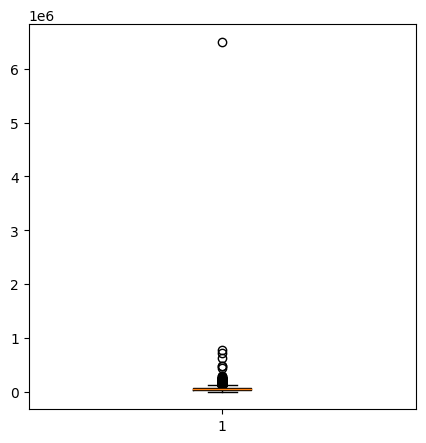

In [31]:
plt.figure(figsize=(5,5))
plt.boxplot(df['Driven'])

In [32]:
df[df['Driven']>6000000]

,Location,Year,Driven,Fuel,Trans,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
2328,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,65.0,BMW


In [33]:
df['Driven'][2328] = int(df['Driven'].mean())

{'whiskers': [<matplotlib.lines.Line2D at 0x1bed9b7db48>,
 'caps': [<matplotlib.lines.Line2D at 0x1bed9b80a48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bed9b7be08>],
 'medians': [<matplotlib.lines.Line2D at 0x1bed9b84b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bed9b85408>],
 'means': []}

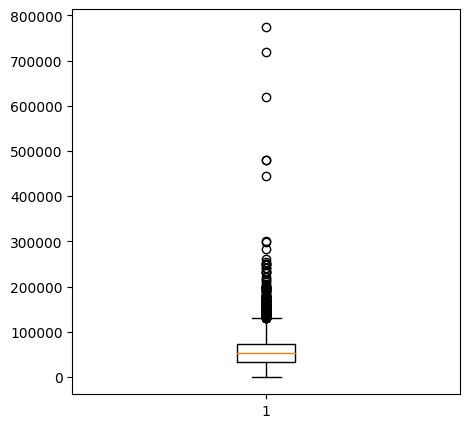

In [34]:
plt.figure(figsize=(5,5))
plt.boxplot(df['Driven'])

## 3-7.Heatmap

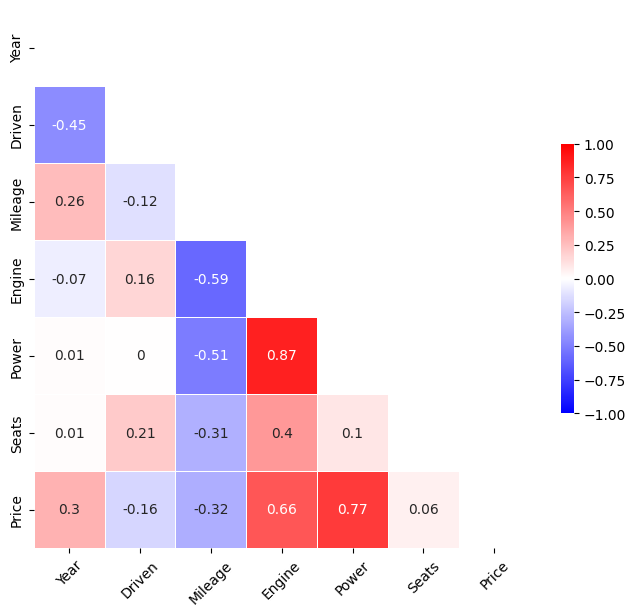

In [35]:
df1 = df[['Year', 'Driven','Mileage', 'Engine', 'Power', 'Seats', 'Price']].corr().round(2)

fig, ax = plt.subplots(figsize = (8,7))

mask = np.zeros_like(df1, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df1, 
            cmap = 'bwr', 
            annot = True,   
            mask = mask,     
            linewidths =.5,  
            cbar_kws = {"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.xticks(rotation=45)
plt.show()

## 3-8.원핫인코딩

In [36]:
mapping = {'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4}
df['Owner'] = df['Owner_Type'].map(mapping)

In [37]:
df.drop('Owner_Type', axis = 1, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  5872 non-null   object 
 1   Year      5872 non-null   int64  
 2   Driven    5872 non-null   int64  
 3   Fuel      5872 non-null   object 
 4   Trans     5872 non-null   object 
 5   Mileage   5872 non-null   float64
 6   Engine    5872 non-null   float64
 7   Power     5872 non-null   float64
 8   Seats     5872 non-null   float64
 9   Price     5872 non-null   float64
 10  Brand     5872 non-null   object 
 11  Owner     5872 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 725.4+ KB


In [39]:
obj_cols = df.select_dtypes(include='object').columns
obj_cols

Index(['Location', 'Fuel', 'Trans', 'Brand'], dtype='object')

In [40]:
nobj_cols  = df.select_dtypes(exclude='object').columns
nobj_cols 

Index(['Year', 'Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price',
       'Owner'],
      dtype='object')

In [41]:
for col in obj_cols: 
    n = len(df[col].value_counts())
    print(col, ":", str(n))

Location : 11
Fuel : 4
Trans : 2
Brand : 29


In [42]:
for col in nobj_cols: 
    n = len(df[col].value_counts())
    print(col, ":", str(n))

Year : 22
Driven : 3038
Mileage : 441
Engine : 139
Power : 368
Seats : 8
Price : 1364
Owner : 4


In [43]:
# 데이터 타입별 시각화 함수

def bar_plot(col, data, hue=None):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(x=col, hue=hue, data=data, alpha=0.5)
    plt.xticks(rotation=45)
    plt.show()
    
    
def dist_plot(col, data):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.distplot(data[col], ax=ax)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
    plt.xticks(rotation=45)
    plt.show()

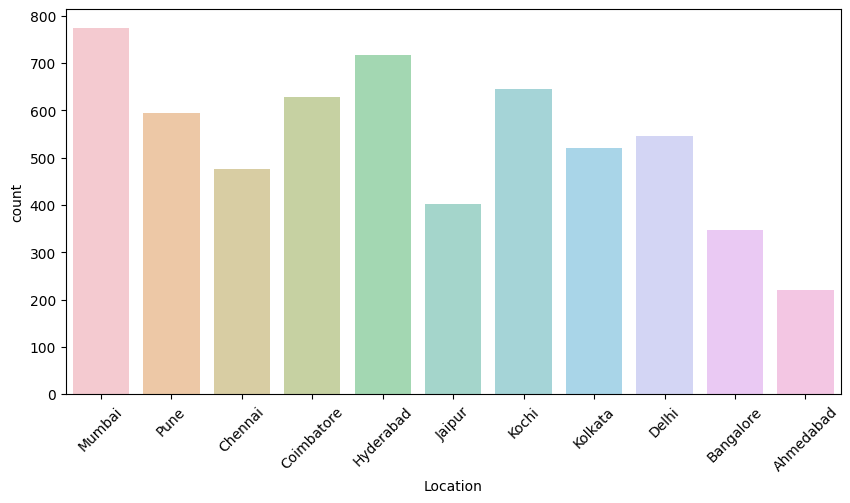

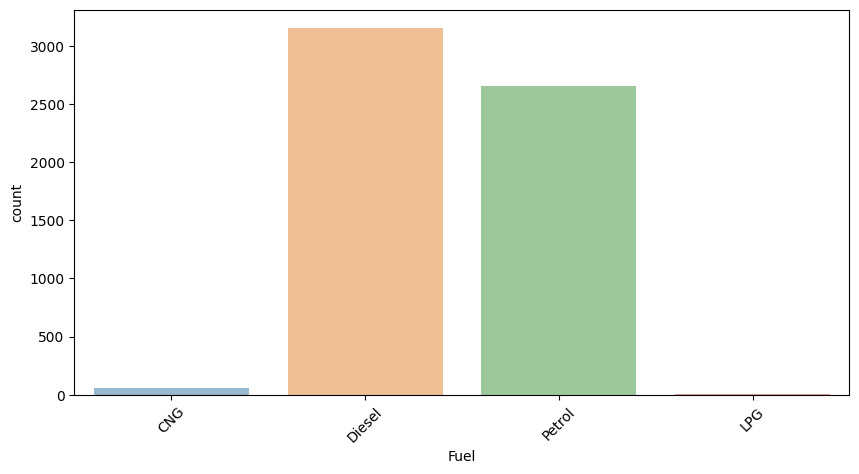

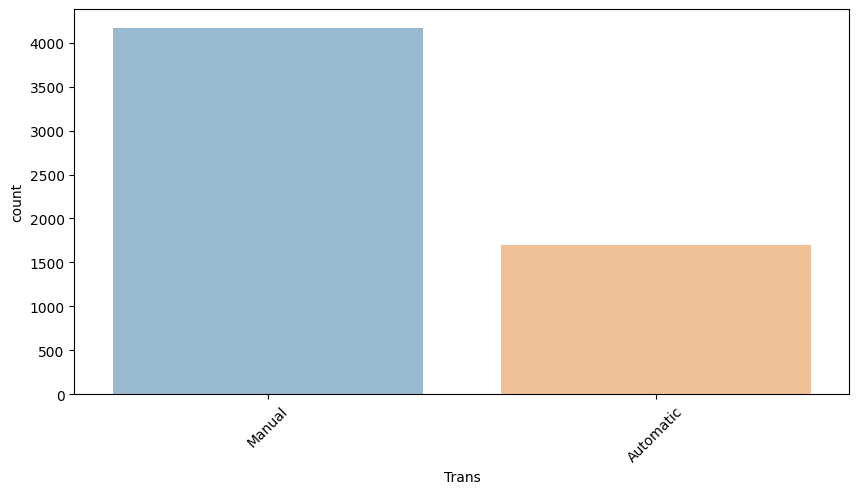

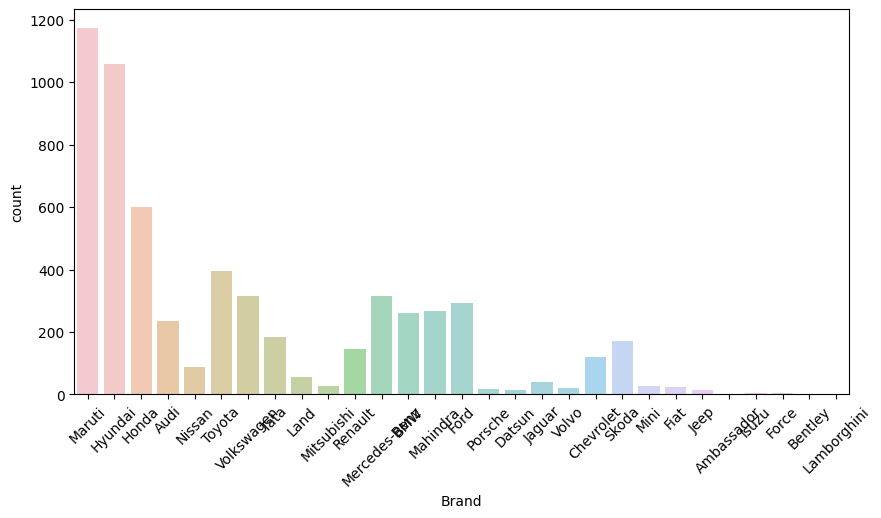

In [44]:
for col in obj_cols:
    bar_plot(col, df)

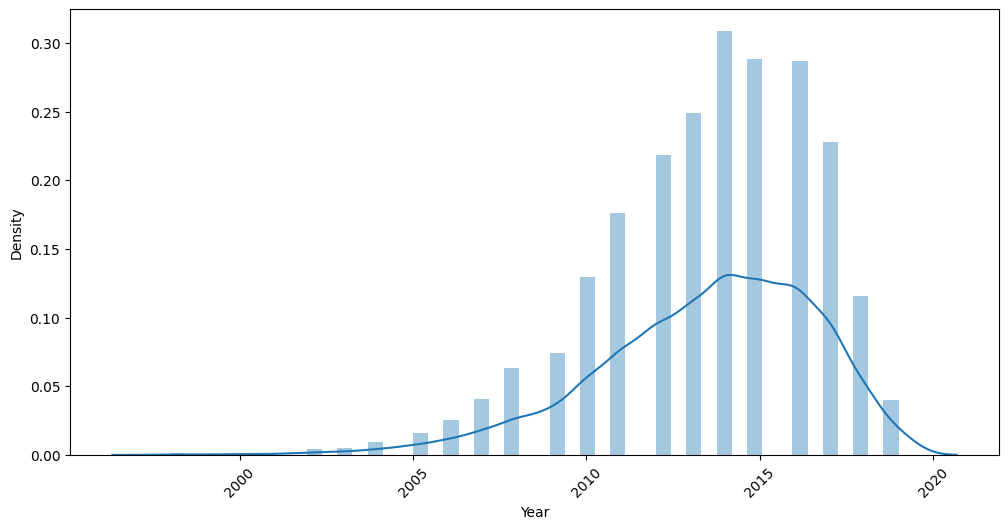

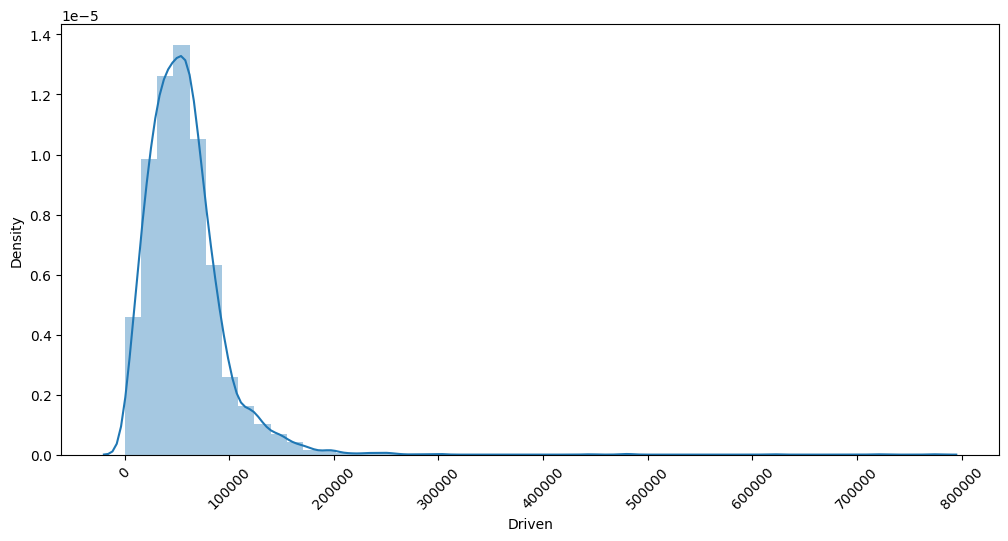

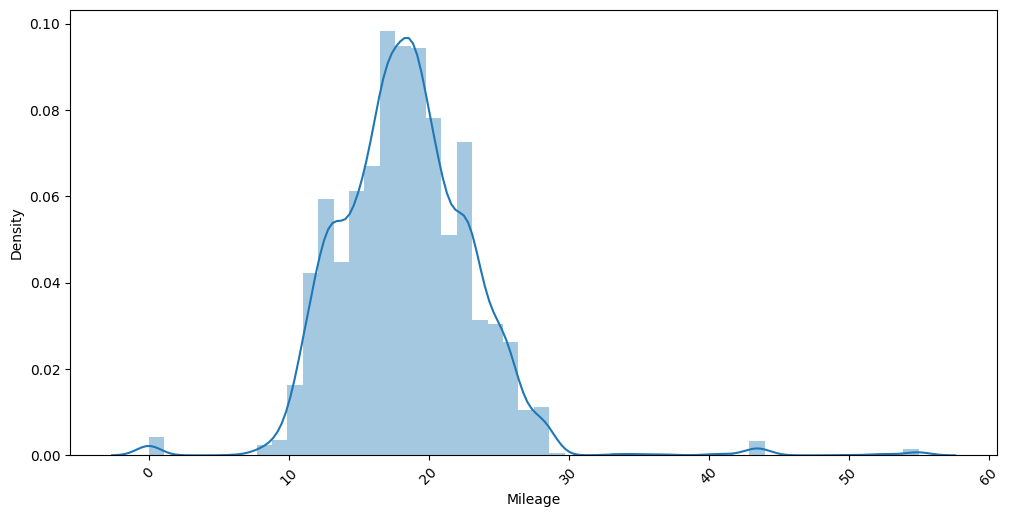

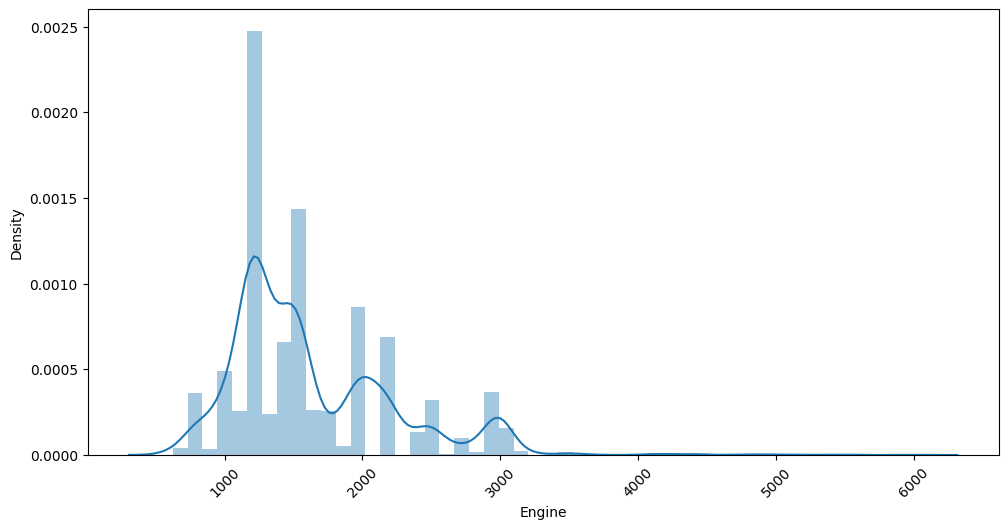

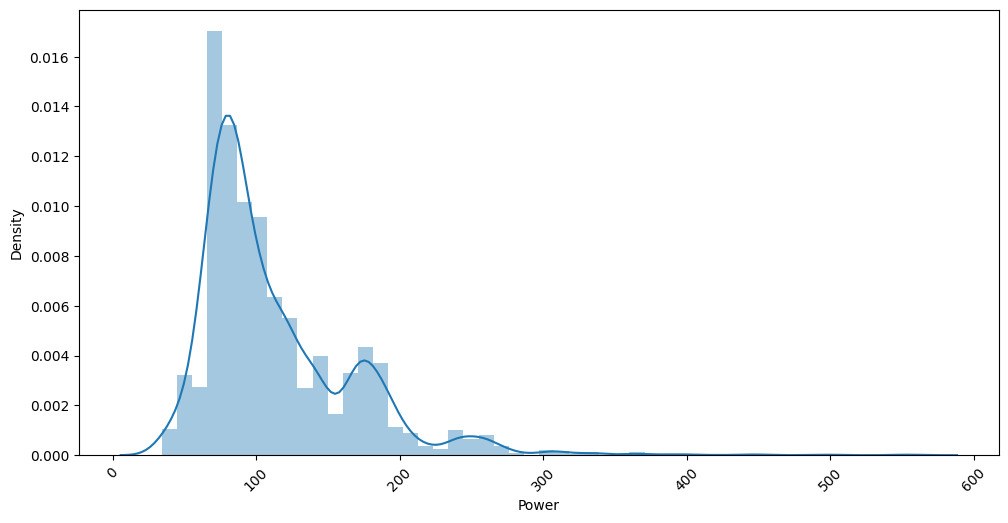

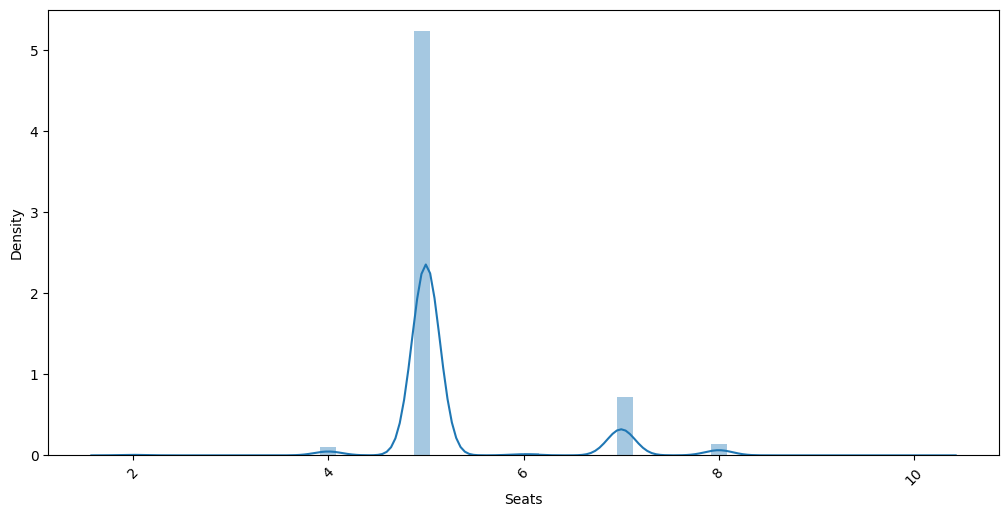

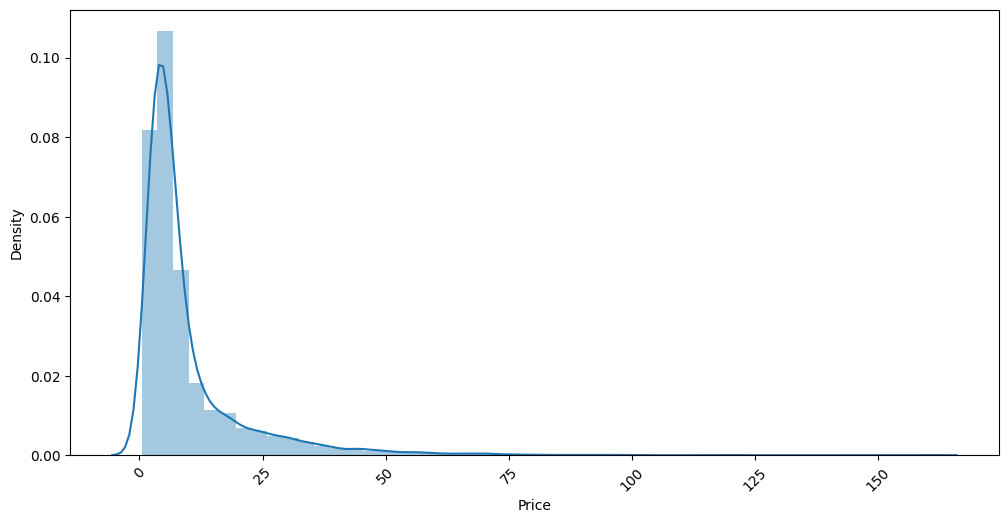

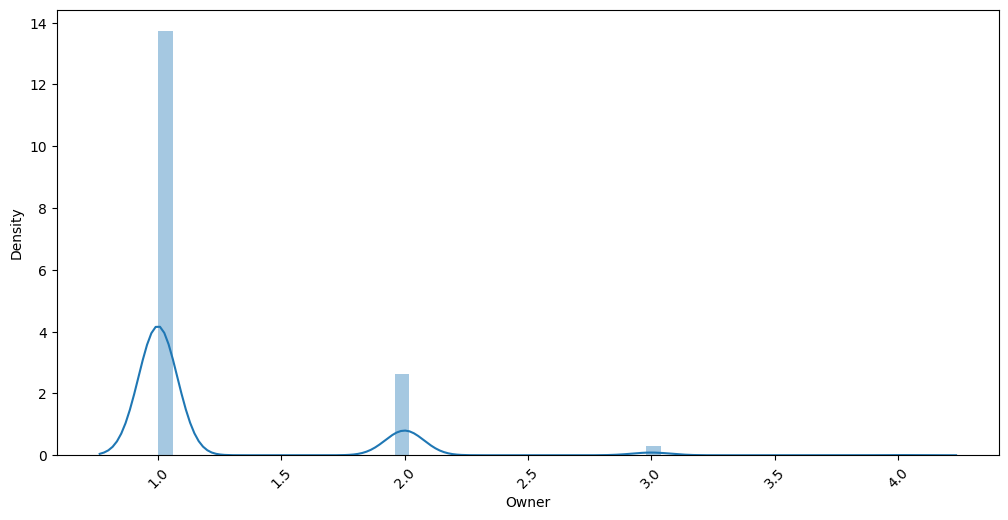

In [45]:
for col in nobj_cols:
    dist_plot(col, df)

In [46]:
data = pd.get_dummies(df, columns = ['Location','Fuel','Trans'])

In [47]:
data

,Year,Driven,Mileage,Engine,Power,Seats,Price,Brand,Owner,Location_Ahmedabad,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Trans_Automatic,Trans_Manual
0,2010,72000,43.624,998.0,58.16,5.0,1.75,Maruti,1,0,...,0,0,1,0,1,0,0,0,0,1
1,2015,41000,19.670,1582.0,126.20,5.0,12.50,Hyundai,1,0,...,0,0,0,1,0,1,0,0,0,1
2,2011,46000,18.200,1199.0,88.70,5.0,4.50,Honda,1,0,...,0,0,0,0,0,0,0,1,0,1
3,2012,87000,20.770,1248.0,88.76,7.0,6.00,Maruti,1,0,...,0,0,0,0,0,1,0,0,0,1
4,2013,40670,15.200,1968.0,140.80,5.0,17.74,Audi,2,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.400,1248.0,74.00,5.0,4.75,Maruti,1,0,...,0,0,0,0,0,1,0,0,0,1
6015,2015,100000,24.400,1120.0,71.00,5.0,4.00,Hyundai,1,0,...,0,0,0,0,0,1,0,0,0,1
6016,2012,55000,14.000,2498.0,112.00,8.0,2.90,Mahindra,2,0,...,0,0,0,0,0,1,0,0,0,1
6017,2013,46000,18.900,998.0,67.10,5.0,2.65,Maruti,1,0,...,0,1,0,0,0,0,0,1,0,1


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 5872 non-null   int64  
 1   Driven               5872 non-null   int64  
 2   Mileage              5872 non-null   float64
 3   Engine               5872 non-null   float64
 4   Power                5872 non-null   float64
 5   Seats                5872 non-null   float64
 6   Price                5872 non-null   float64
 7   Brand                5872 non-null   object 
 8   Owner                5872 non-null   int64  
 9   Location_Ahmedabad   5872 non-null   uint8  
 10  Location_Bangalore   5872 non-null   uint8  
 11  Location_Chennai     5872 non-null   uint8  
 12  Location_Coimbatore  5872 non-null   uint8  
 13  Location_Delhi       5872 non-null   uint8  
 14  Location_Hyderabad   5872 non-null   uint8  
 15  Location_Jaipur      5872 non-null   u

## 3-9.함수

In [49]:
def plot_graph(pred, title):
    plt.rcParams["font.size"] = 25
    
    plt.figure(figsize=(25,25))
    plt.scatter(pred, y_test)
    plt.title(title, fontsize = 12)
    plt.xlabel('prediction')
    plt.ylabel('actual')
    plt.xlim(-5, 105)
    plt.ylim(-5, 105)
    line = plt.plot([-5,105], [-5,105])
    plt.setp(line, color = 'r', linewidth = 1.0)
    plt.show()

In [50]:
def plot_coef(columns, coef):
    plt.rcParams["font.size"] = 25
    
    plt.figure(figsize=(25,25))

    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns = ['feature','coef']
    
    coef_df = coef_df.sort_values('coef', ascending=True).reset_index(drop=True)
    coordinates = np.arange(len(coef_df))
    
    plt.barh(y = coordinates, width = coef_df['coef'])
    plt.yticks(coordinates, coef_df['feature'])
    
    plt.xlabel('coefficient')
    plt.ylabel('feature')

In [51]:
def plot_feature_importances(columns, feature_importances):
    plt.rcParams["font.size"] = 25
    
    plt.figure(figsize=(25, 25))

    feature_importances_df = pd.DataFrame(list(zip(columns, feature_importances)))
    feature_importances_df.columns = ['feature', 'feature_importance']
    
    feature_importances_df = feature_importances_df.sort_values('feature_importance', ascending=True).reset_index(drop=True)
    coordinates = np.arange(len(feature_importances_df))    

    plt.barh(y = coordinates, width = feature_importances_df['feature_importance'])
    plt.yticks(coordinates, feature_importances_df['feature'])
    
    plt.xlabel('independent variable importance decision')
    plt.ylabel('independent variable')

# 4.머신러닝

## 4-1-1.선형회귀분석

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error

In [53]:
X = data.drop(['Price','Brand'], axis = 1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
pred_lr = lr.predict(X_test)

In [57]:
print('Train data Accuracy : ', format(lr.score(X_train, y_train)))
print('Test data r-square : ', format(r2_score(y_test,pred_lr)))
print('Root mean squared error : ', format(mean_squared_error(y_test, pred_lr, squared=False)))

Train data Accuracy :  0.709835367825089
Test data r-square :  0.7171186708836319
Root mean squared error :  5.881483114449467


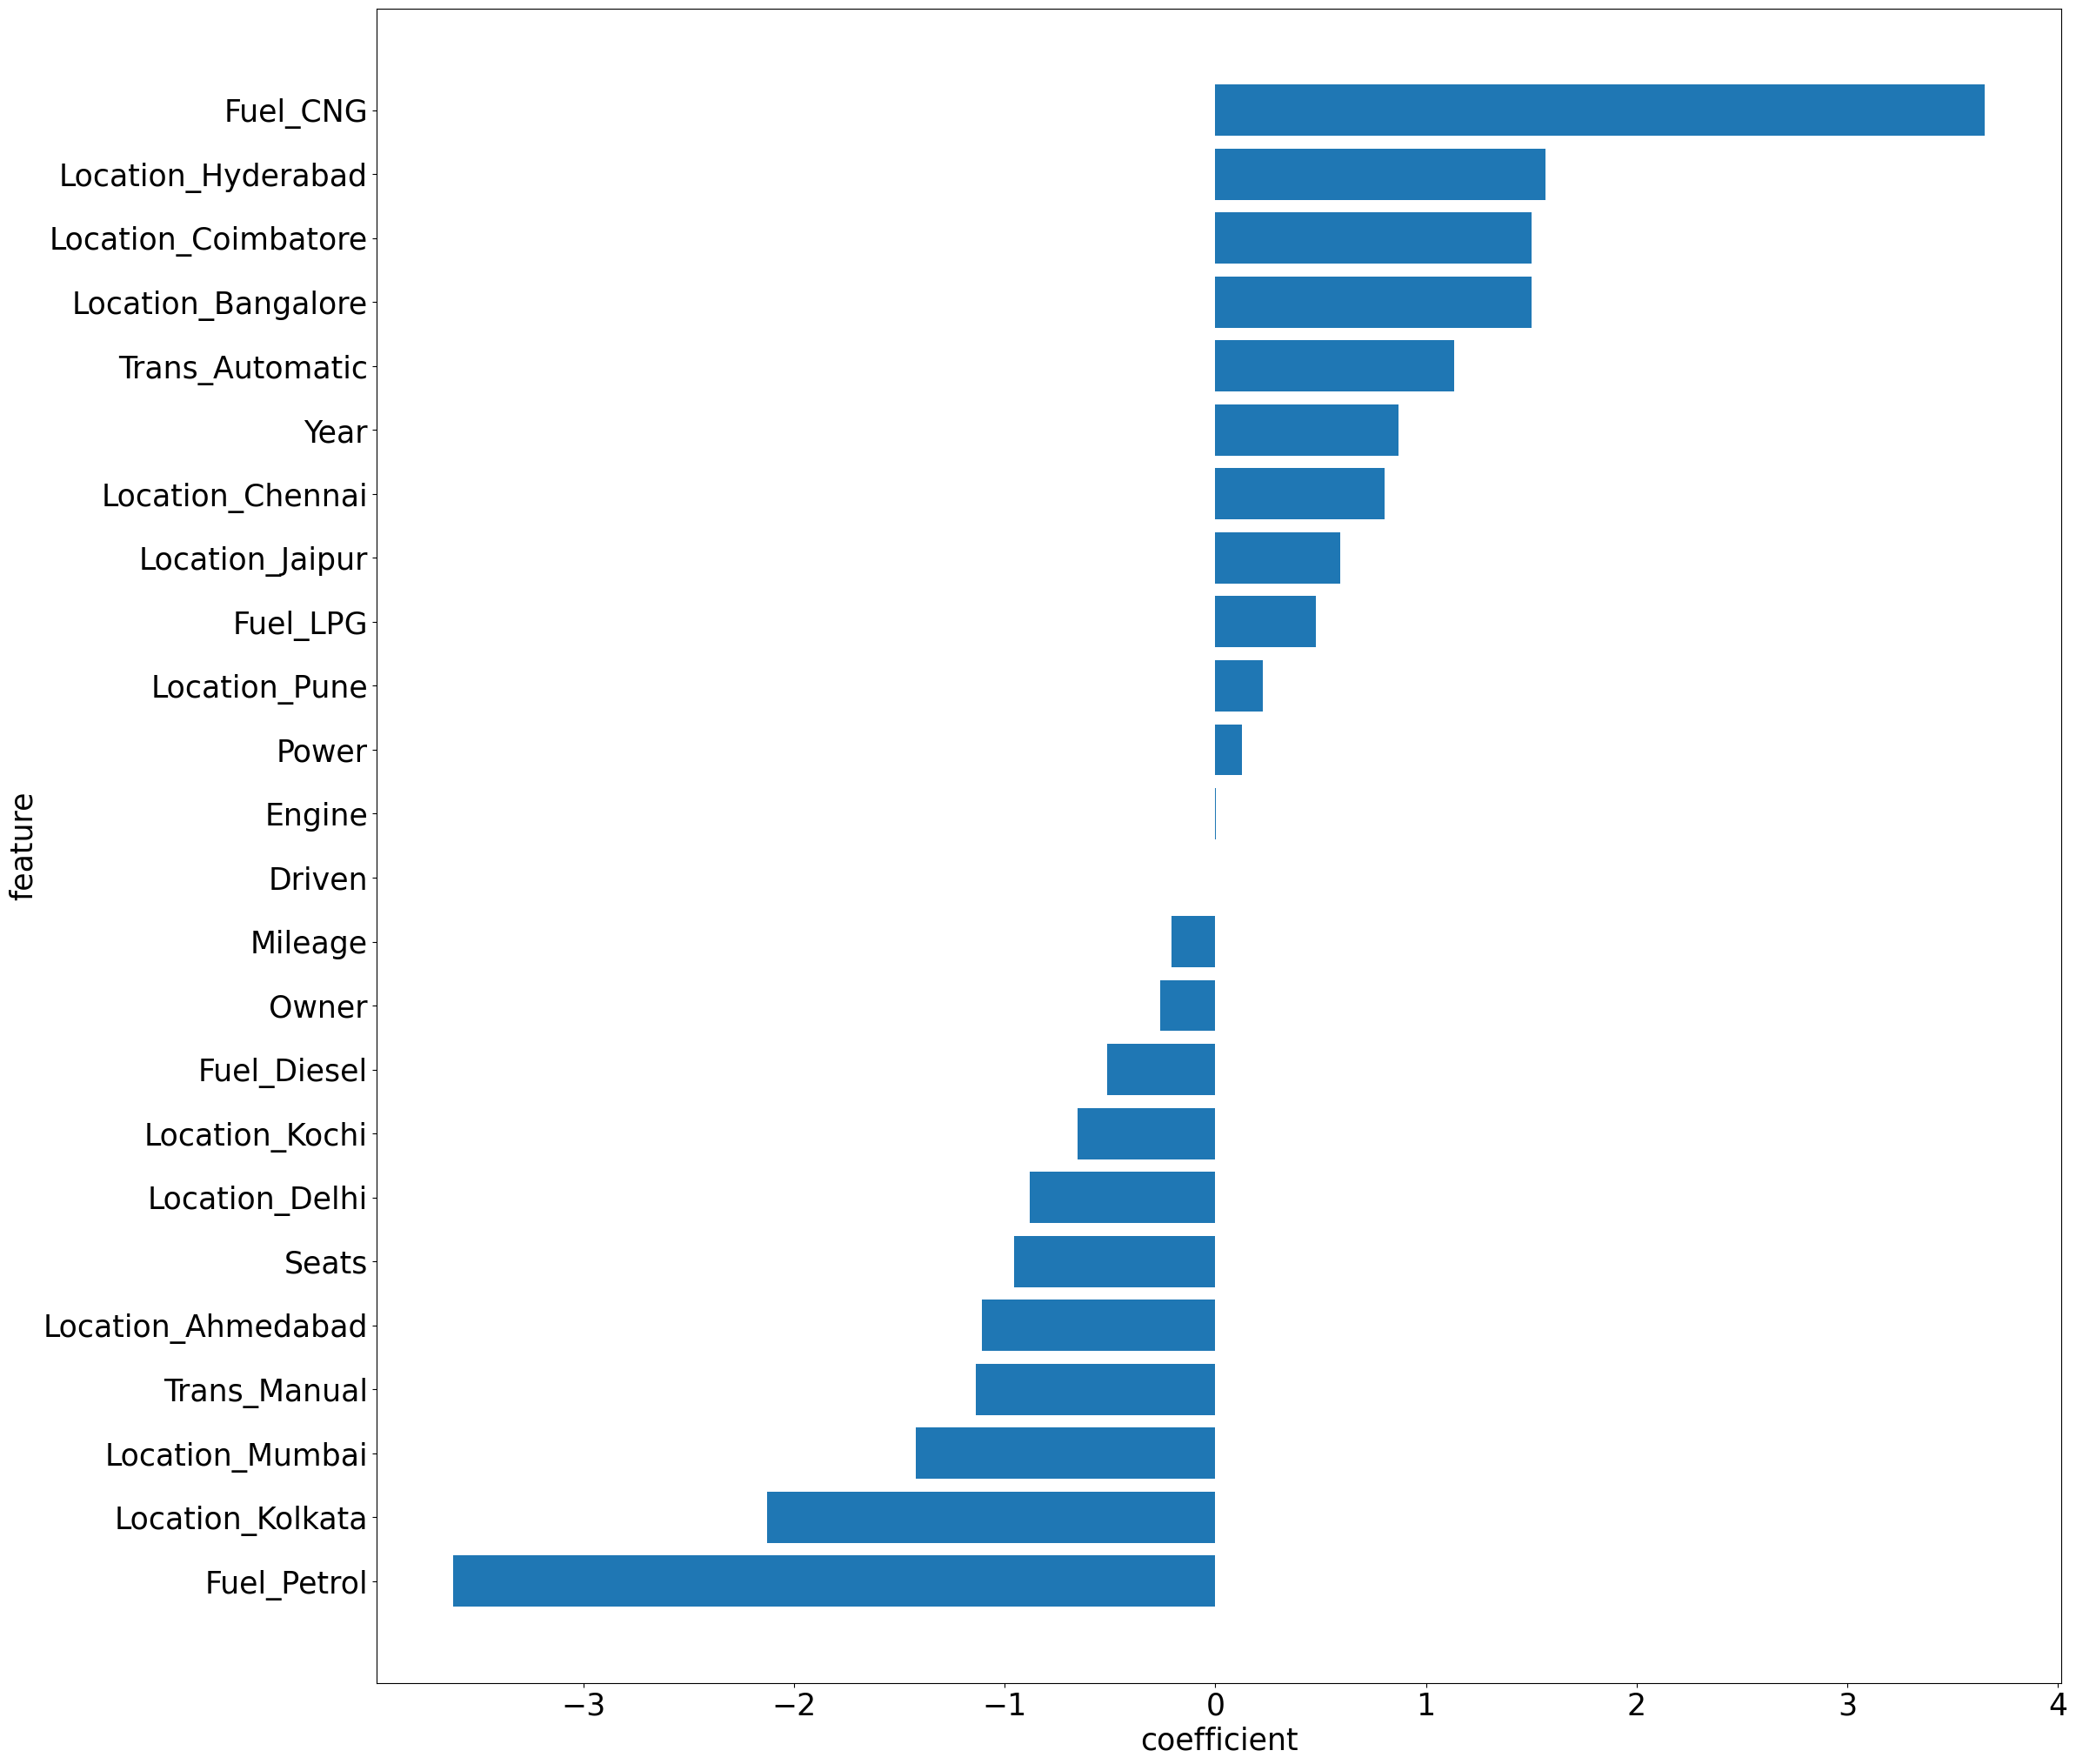

In [58]:
plot_coef(X_train.columns, lr.coef_)

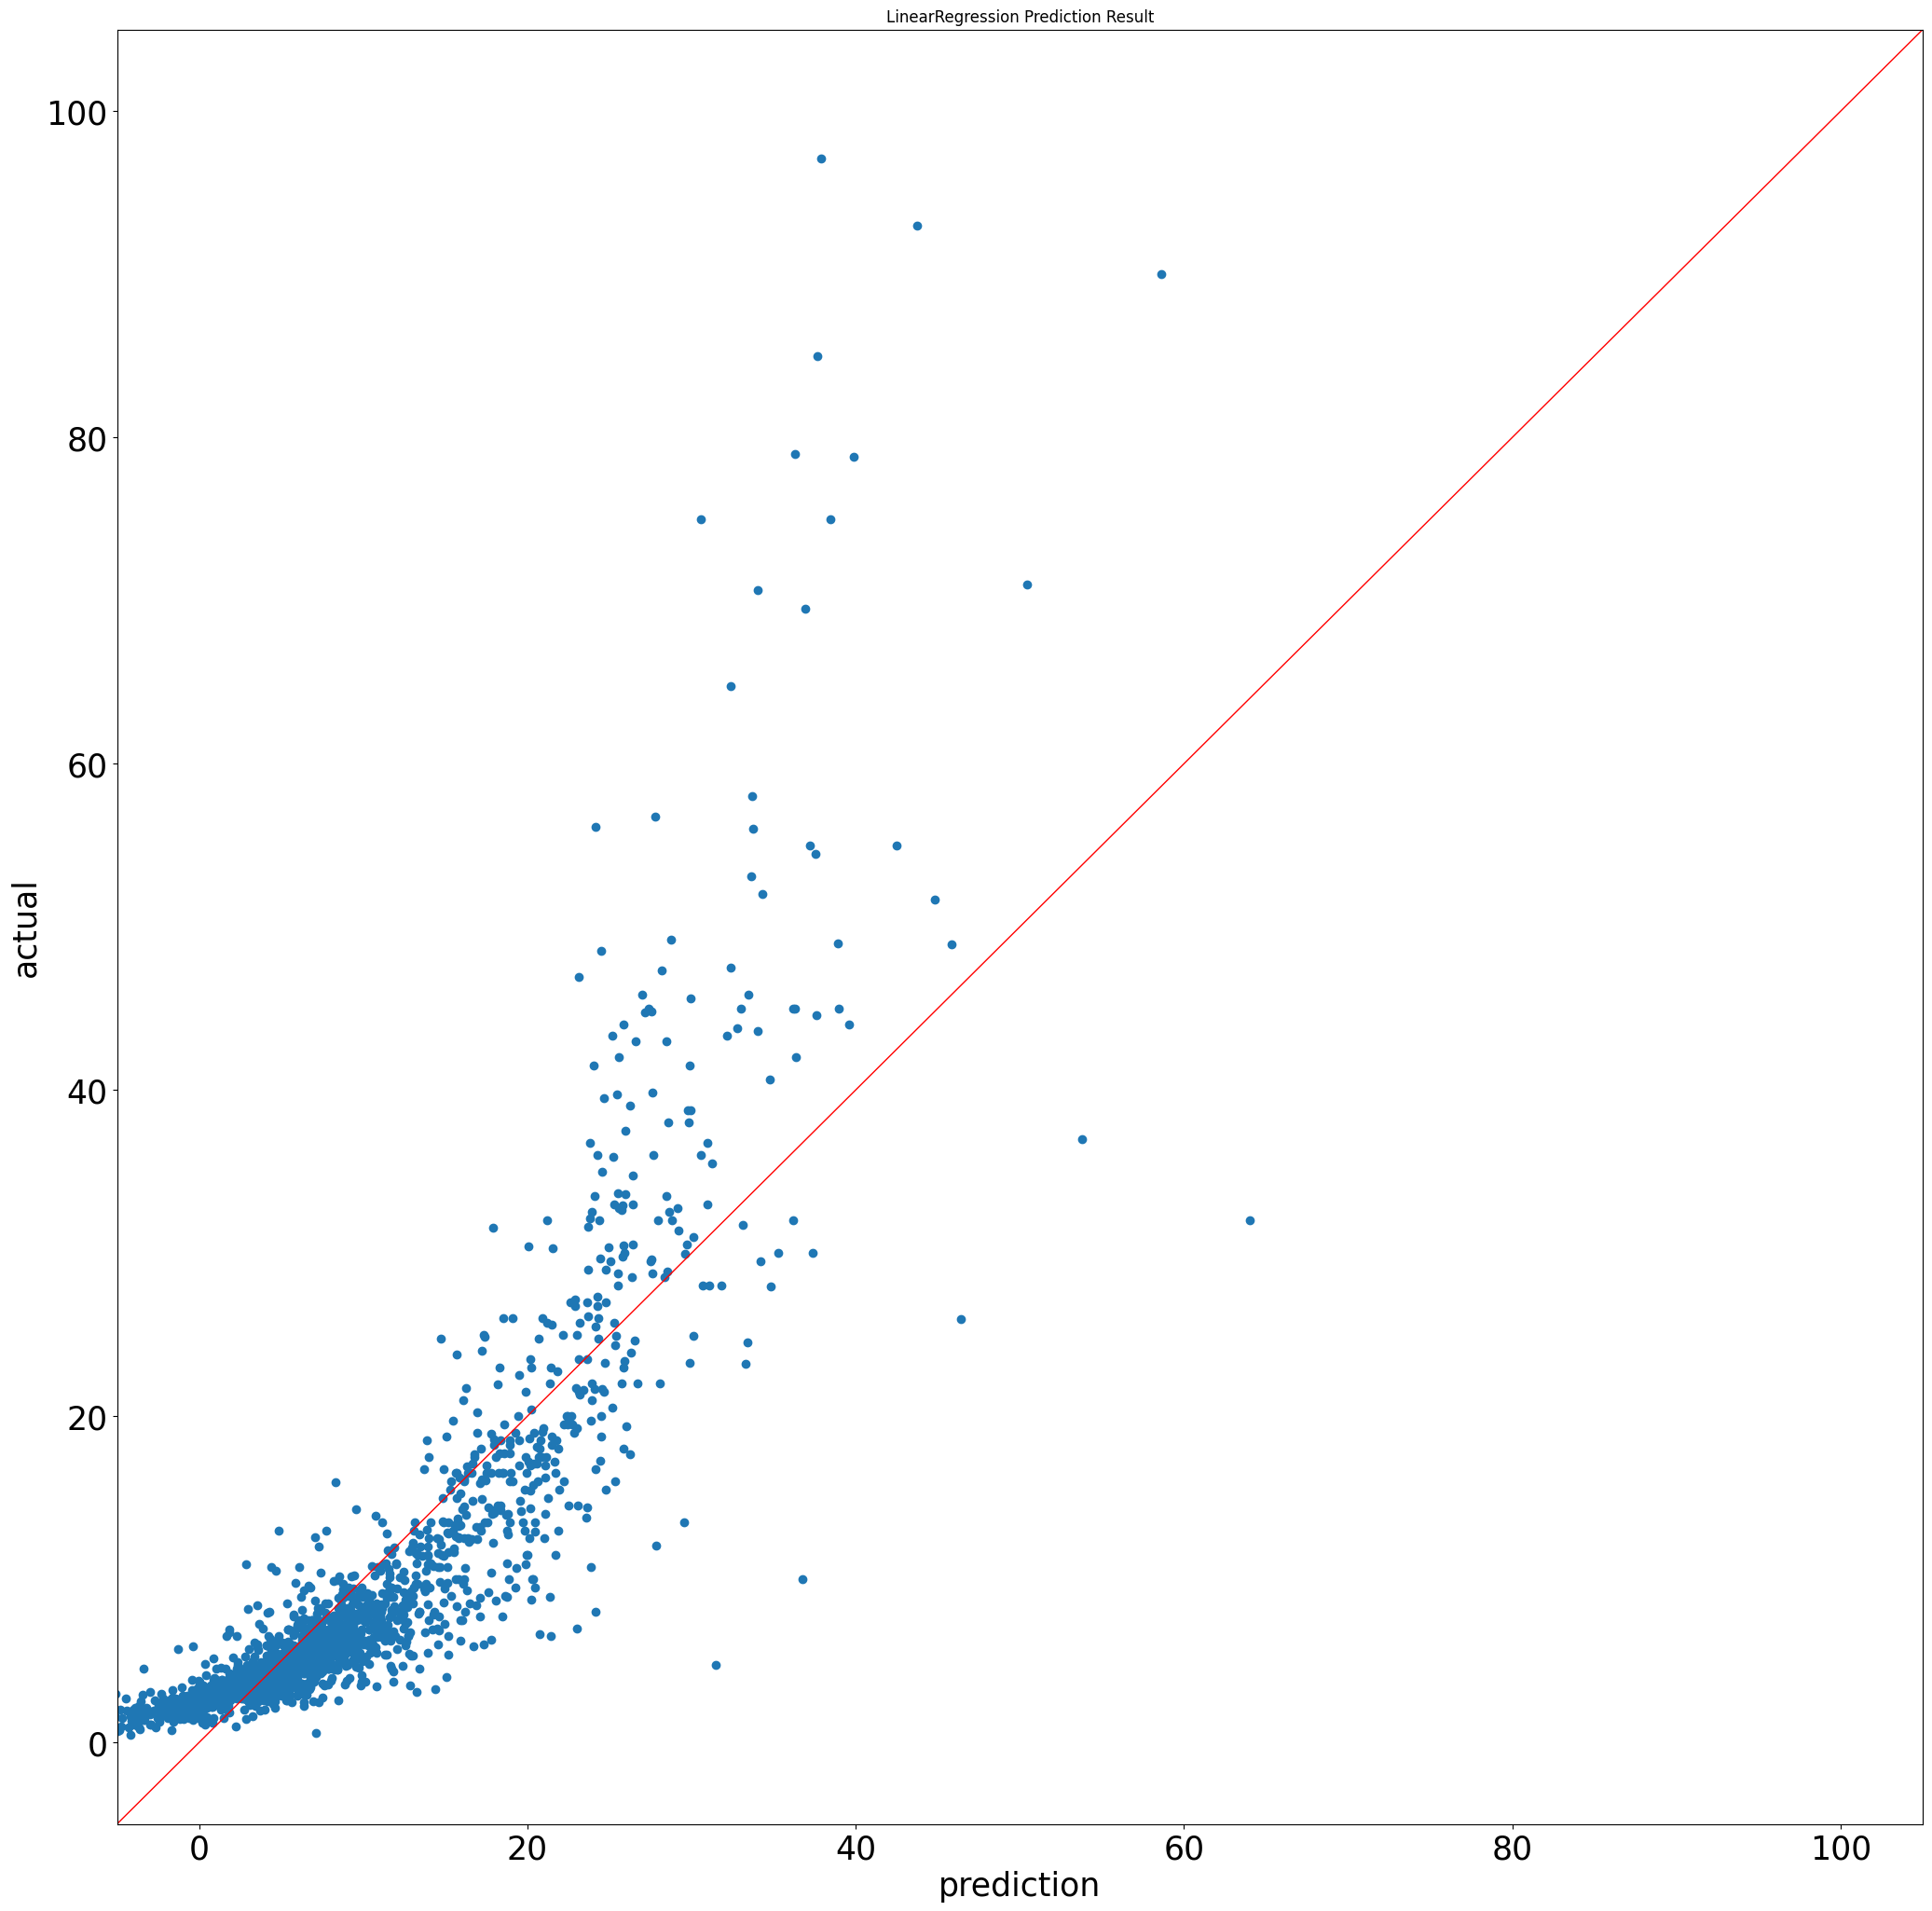

In [59]:
plot_graph(pred_lr, "LinearRegression Prediction Result")

In [60]:
y_train_log = np.log(y_train)
lr.fit(X_train, y_train_log)
new_pred = lr.predict(X_test)
pred_exp = np.exp(new_pred)

In [61]:
print('Train data Accuracy : ', format(lr.score(X_train, y_train_log)))
print('Test data r-square : ', format(r2_score(y_test,pred_exp)))
print('Root mean squared error : ', format(mean_squared_error(y_test, pred_exp, squared = False)))

Train data Accuracy :  0.8814551272415928
Test data r-square :  0.6866084389565615
Root mean squared error :  6.190537538207451


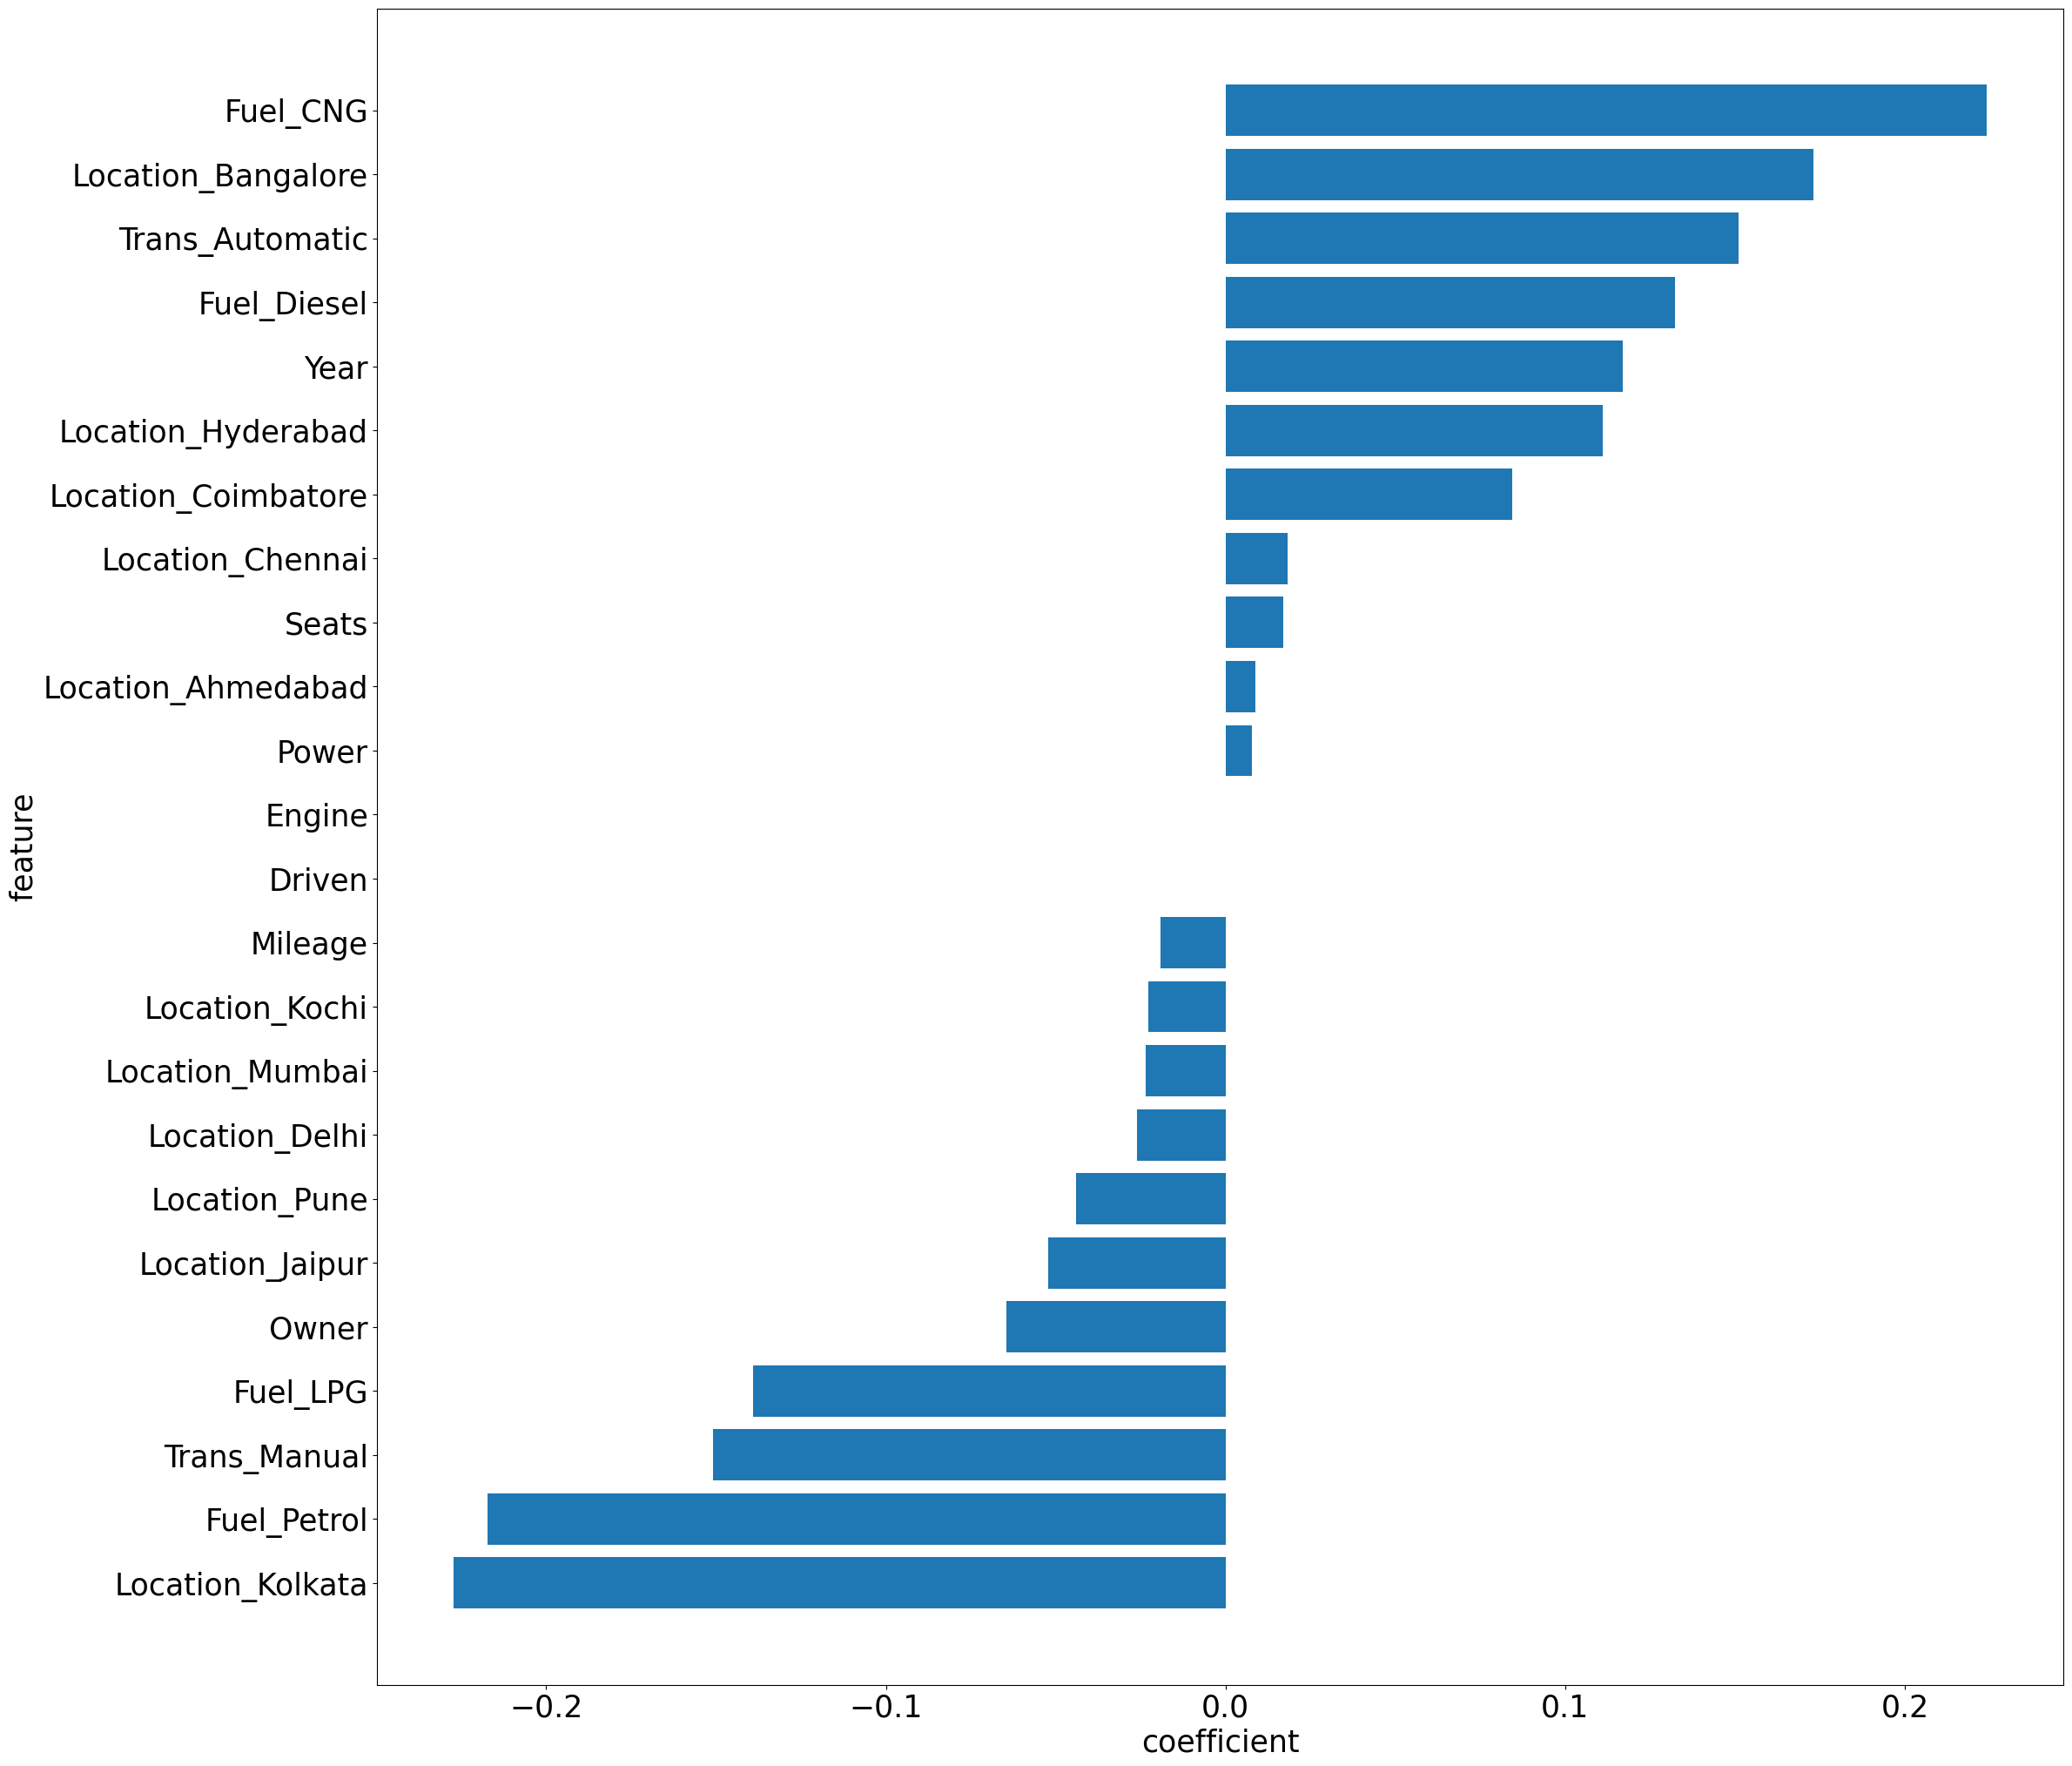

In [62]:
plot_coef(X_train.columns, lr.coef_)

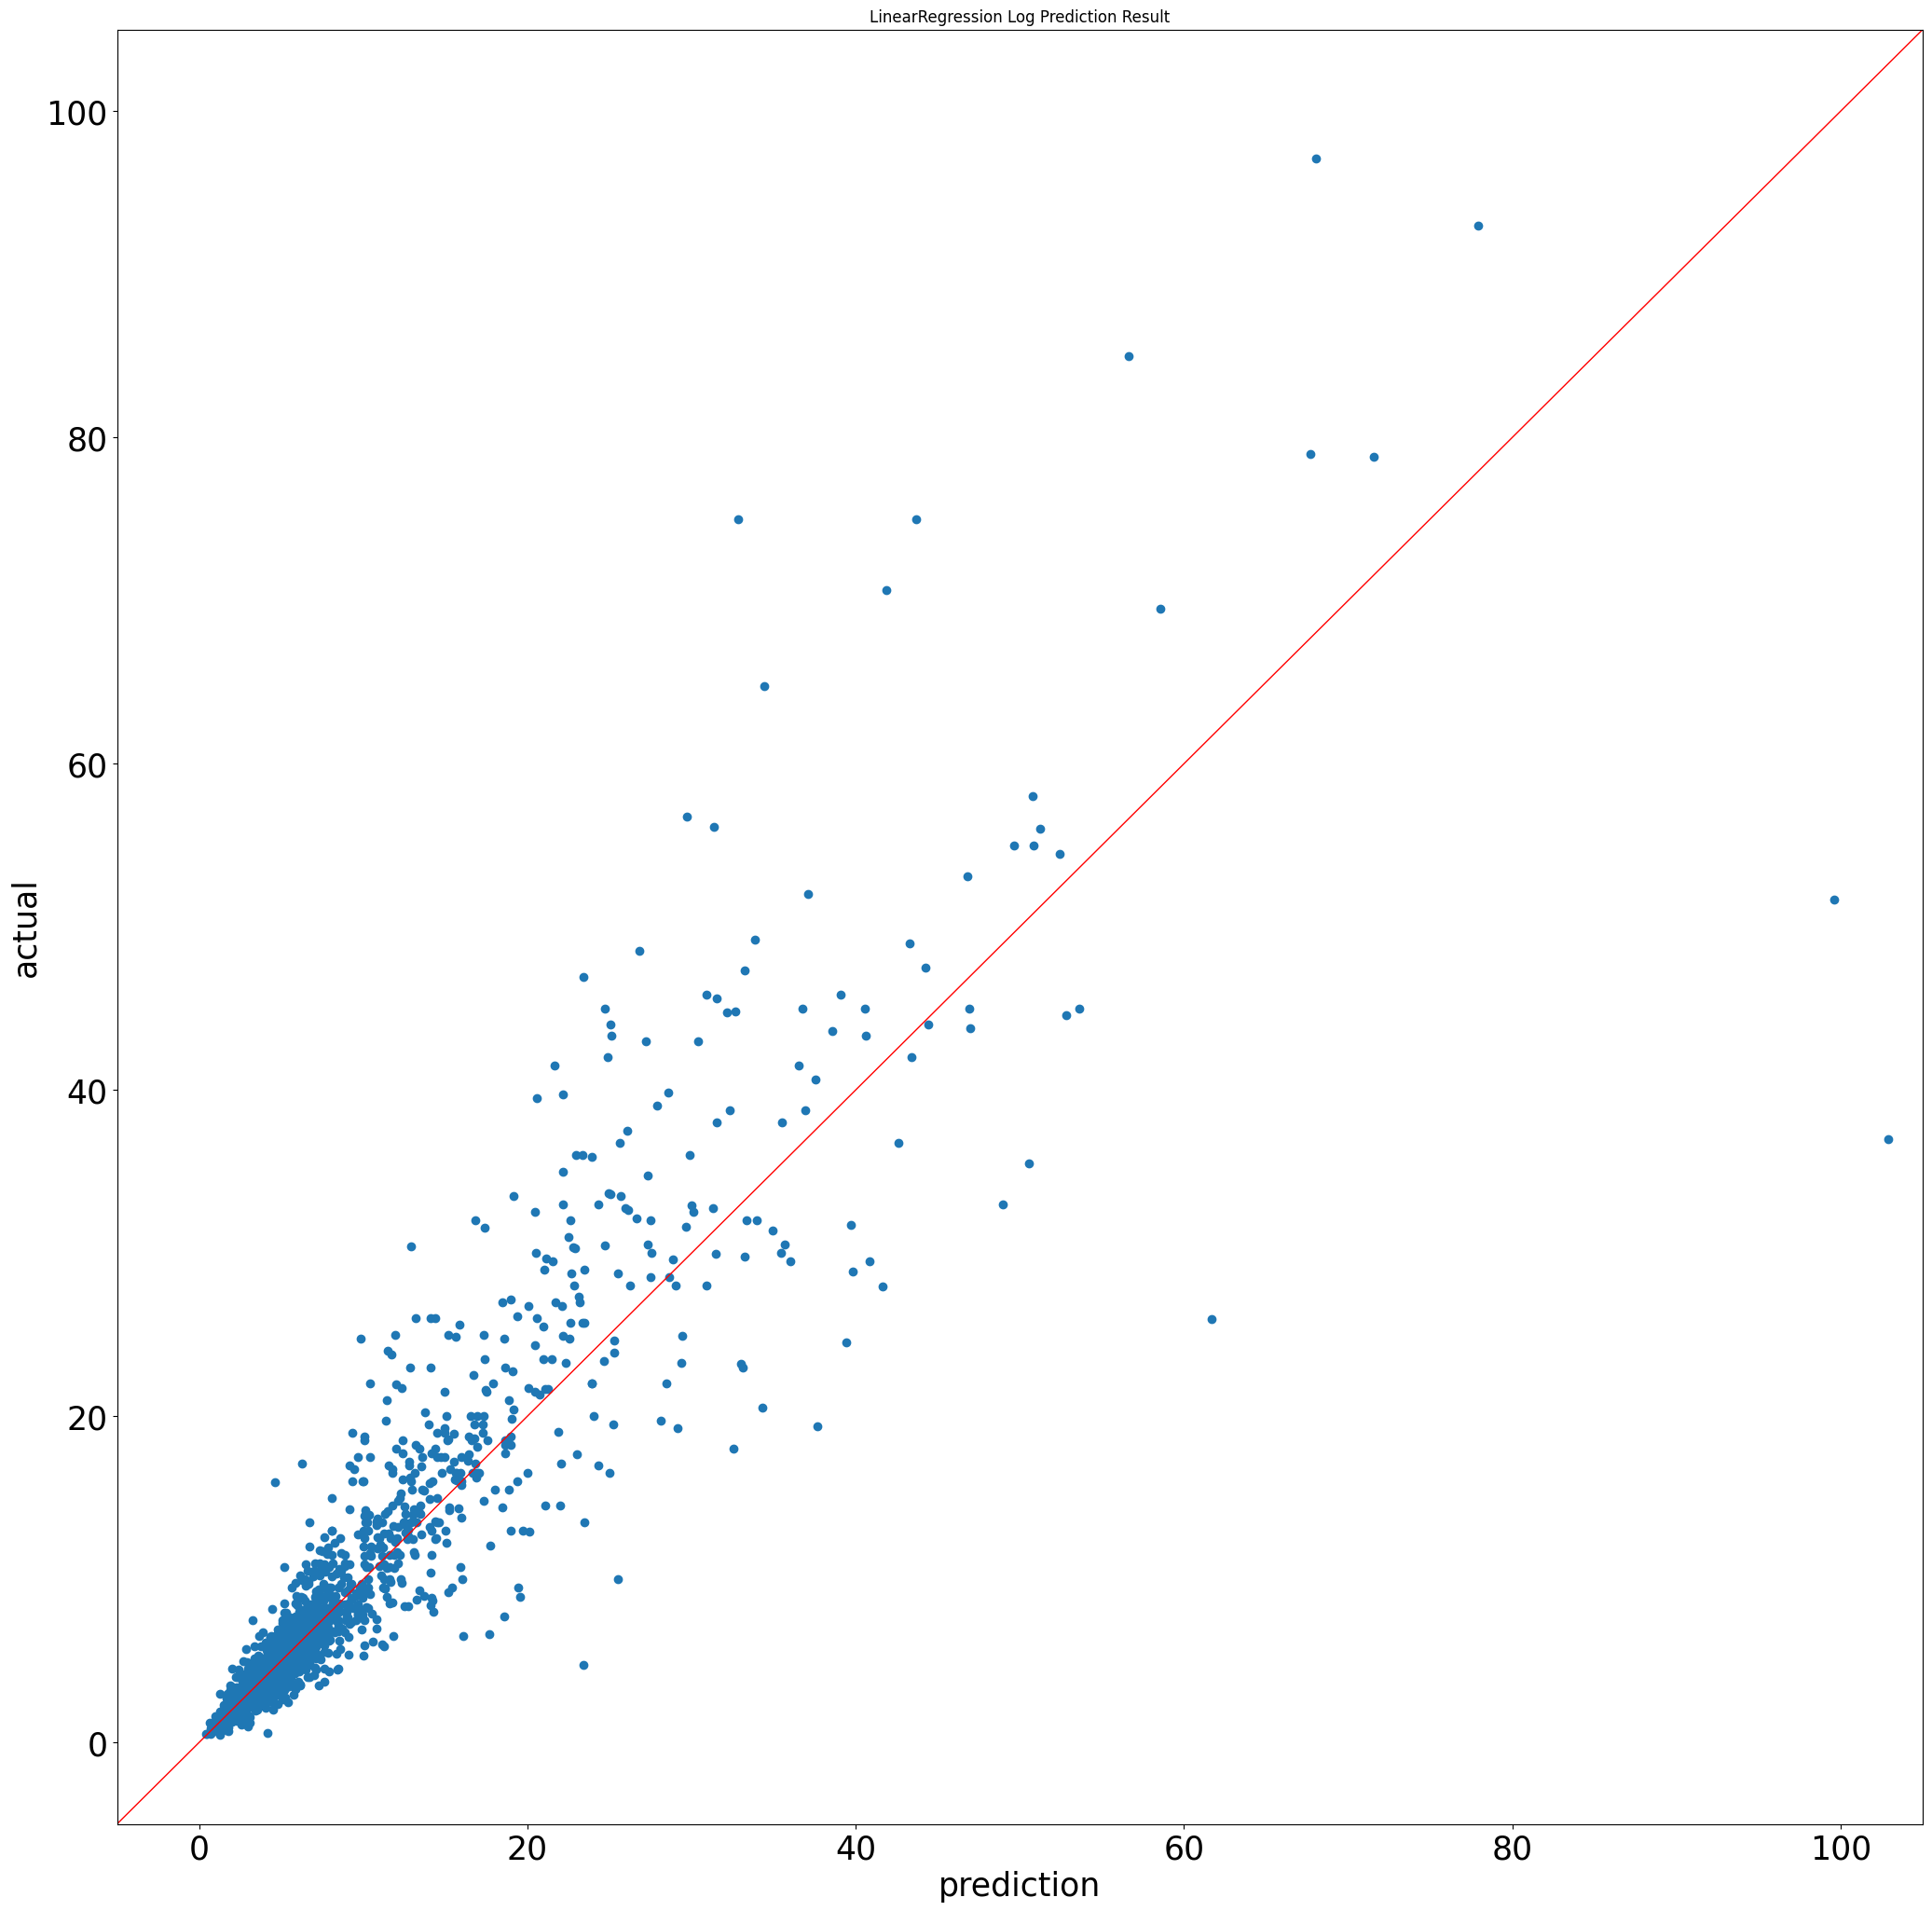

In [63]:
plot_graph(pred_exp, "LinearRegression Log Prediction Result")

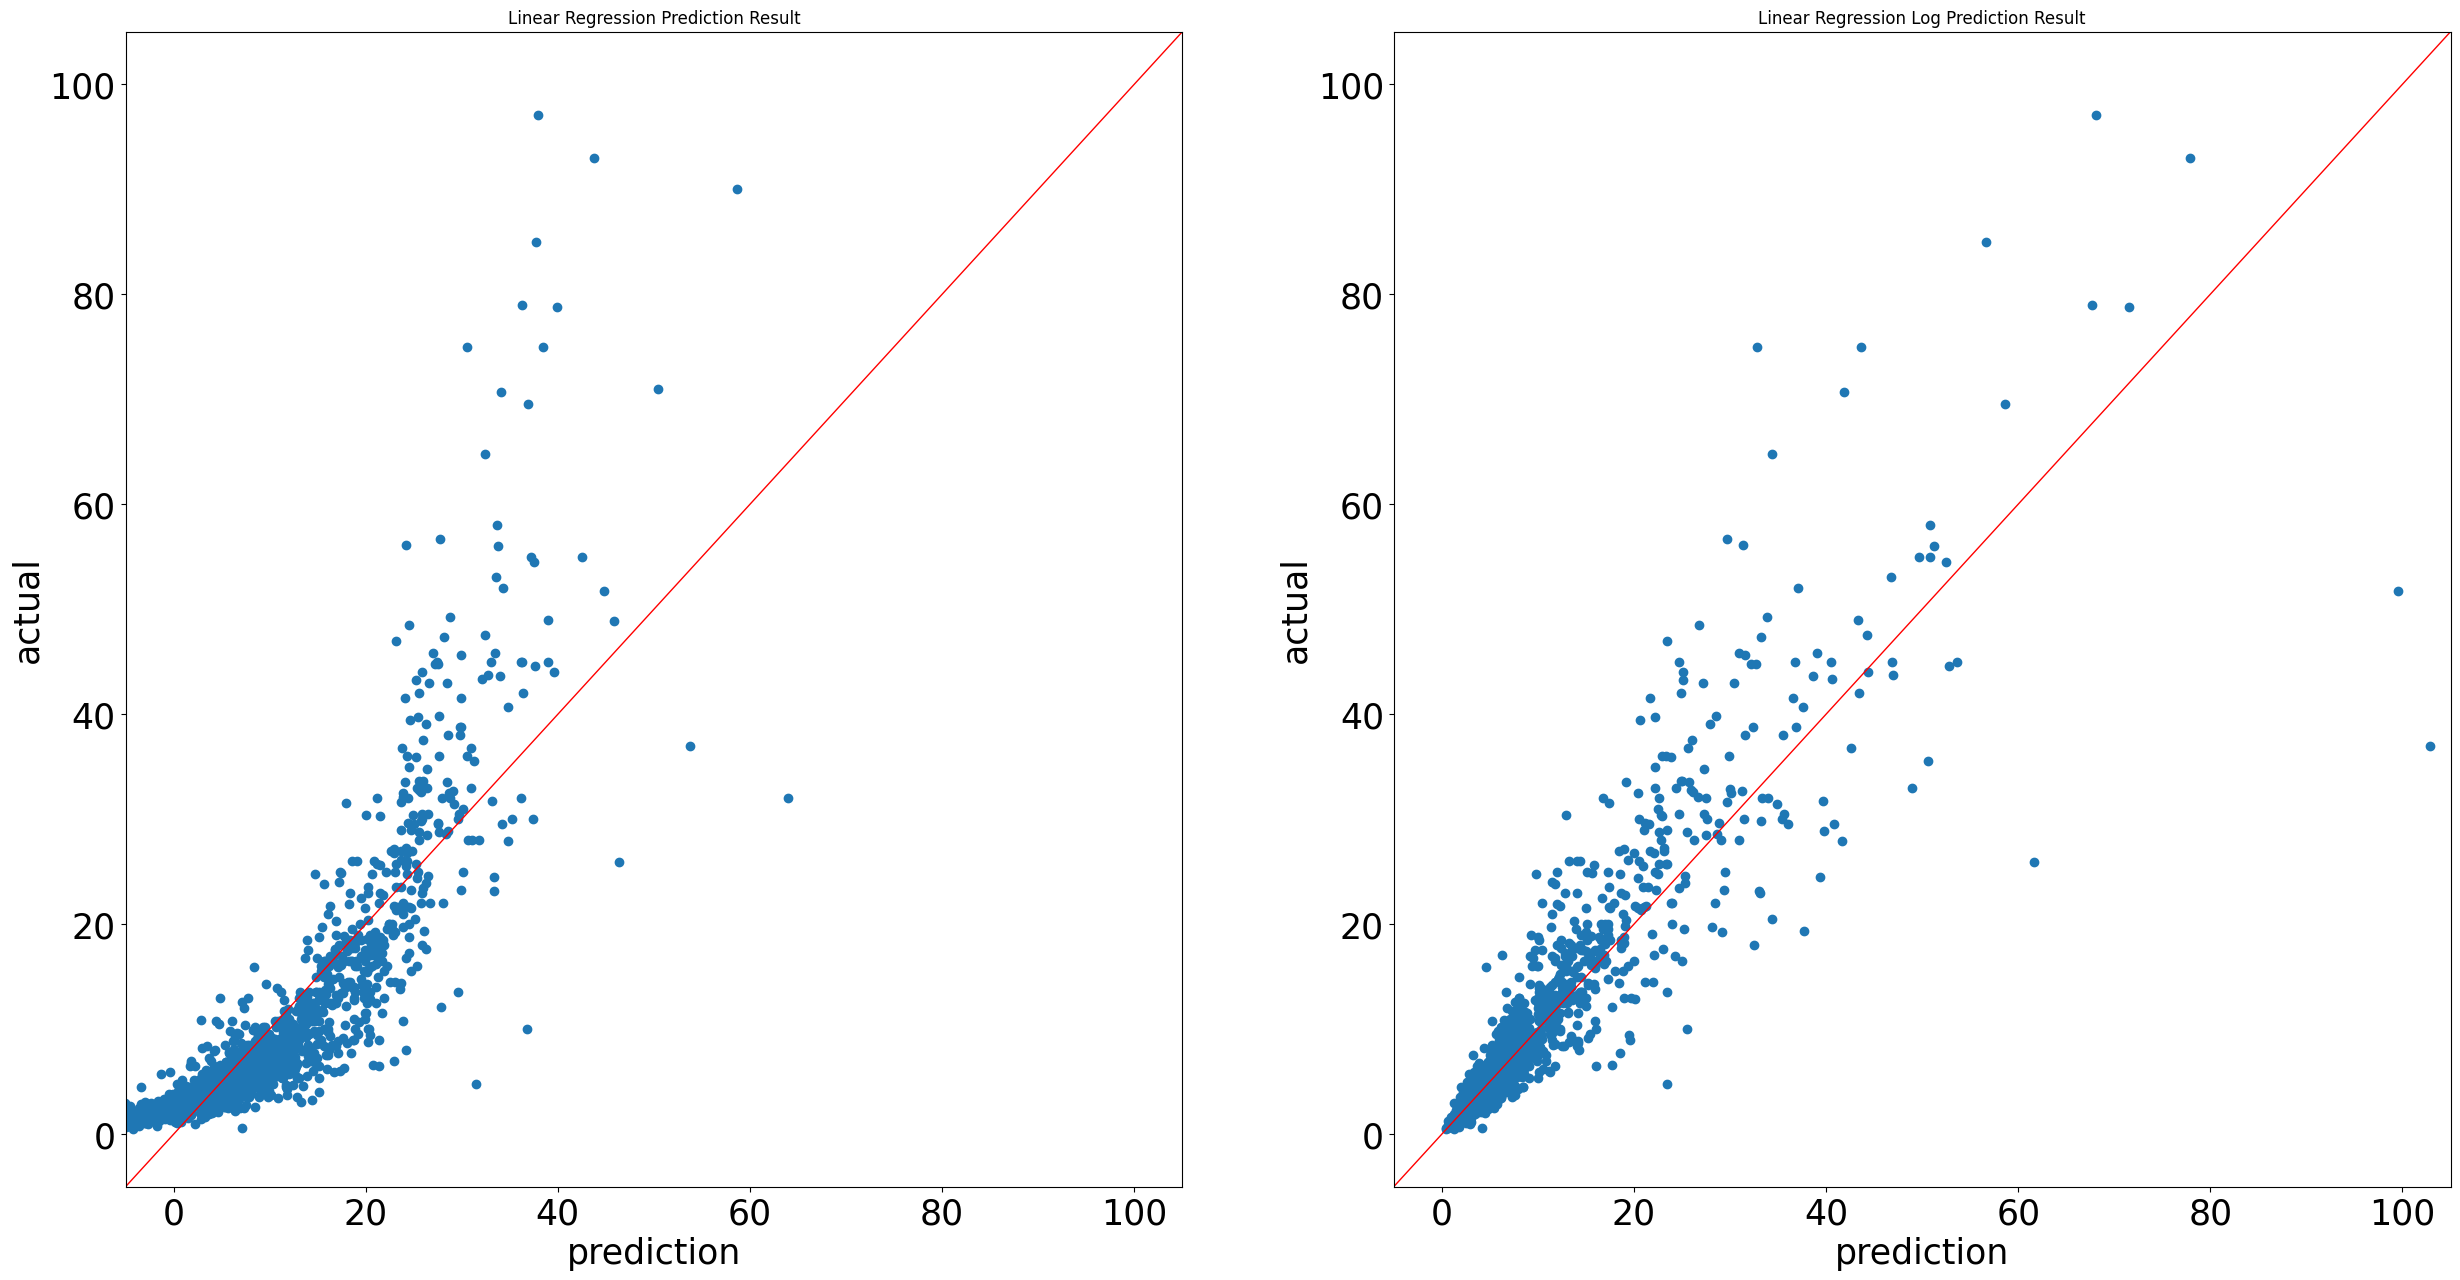

In [64]:
plt.figure(figsize=(30,15))
plt.subplot(1, 2, 1)
plt.scatter(pred_lr, y_test)
plt.title("Linear Regression Prediction Result", fontsize = 12)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.xlim(-5,105)
plt.ylim(-5,105)
line = plt.plot([-5,105], [-5,105])
plt.setp(line, color = 'r', linewidth = 1.0)

plt.subplot(1, 2, 2)
plt.scatter(pred_exp, y_test)
plt.title("Linear Regression Log Prediction Result", fontsize = 12)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.xlim(-5,105)
plt.ylim(-5,105)
line = plt.plot([-5,105], [-5,105])
plt.setp(line, color = 'r', linewidth = 1.0)
plt.show()

## 4-1-2. Lasso

In [65]:
from sklearn.linear_model import Lasso

In [66]:
alphas = [100, 10, 1, 0.1,0.01,0.001,0.0001]

In [67]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    pred_lasso = lasso.predict(X_test)
    
    print('Alpha:', alpha)
    print('Train data Accuracy : ', format(lasso.score(X_train, y_train)))
    print('Test data r-square : ', format(r2_score(y_test, pred_lasso)))
    print('Root mean squared error : ', format(mean_squared_error(y_test, pred_lasso, squared = False)))
    print()

Alpha: 100
Train data Accuracy :  0.5220965707587577
Test data r-square :  0.5044586875741326
Root mean squared error :  7.7843910729621255

Alpha: 10
Train data Accuracy :  0.6208897537376188
Test data r-square :  0.6304990000096616
Root mean squared error :  6.721907341453021

Alpha: 1
Train data Accuracy :  0.677376783774547
Test data r-square :  0.6945874111175726
Root mean squared error :  6.111223678999212

Alpha: 0.1
Train data Accuracy :  0.7021079364351914
Test data r-square :  0.7148980268102317
Root mean squared error :  5.904523074165691

Alpha: 0.01
Train data Accuracy :  0.7095607139336145
Test data r-square :  0.7176517739715527
Root mean squared error :  5.875938536034624

Alpha: 0.001
Train data Accuracy :  0.7098281821045287
Test data r-square :  0.7171334291683155
Root mean squared error :  5.8813296901591645

Alpha: 0.0001
Train data Accuracy :  0.7098352980343681
Test data r-square :  0.7171219727298555
Root mean squared error :  5.881448789438447



## 4-1-2. Ridge

In [68]:
from sklearn.linear_model import Ridge

In [69]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

In [70]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    pred_ridge = ridge.predict(X_test)
    
    print('Alpha:', alpha)
    print('Train data Accuracy : ', format(ridge.score(X_train, y_train)))
    print('Test data r-square : ', format(r2_score(y_test, pred_ridge)))
    print('Root mean squared error : ', format(mean_squared_error(y_test, pred_ridge, squared = False)))
    print()

Alpha: 100
Train data Accuracy :  0.7082831552498592
Test data r-square :  0.717926203171275
Root mean squared error :  5.873082273842186

Alpha: 10
Train data Accuracy :  0.7097555841497251
Test data r-square :  0.7173609352492889
Root mean squared error :  5.878964074075691

Alpha: 1
Train data Accuracy :  0.7098342338874454
Test data r-square :  0.7171492989390258
Root mean squared error :  5.8811647066078665

Alpha: 0.1
Train data Accuracy :  0.7098353560233821
Test data r-square :  0.7171218167135387
Root mean squared error :  5.88145041134217

Alpha: 0.01
Train data Accuracy :  0.709835367706593
Test data r-square :  0.7171189863174741
Root mean squared error :  5.881479835301743

Alpha: 0.001
Train data Accuracy :  0.7098353678239039
Test data r-square :  0.7171187024355341
Root mean squared error :  5.8814827864462265

Alpha: 0.0001
Train data Accuracy :  0.7098353678250771
Test data r-square :  0.7171186740388964
Root mean squared error :  5.881483081648371



## 4-1-3.ElasticNet

In [71]:
from sklearn.linear_model import ElasticNet

In [72]:
ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

In [73]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.1, l1_ratio=ratio)
    elasticnet.fit(X_train, y_train)
    pred_elasticnet = elasticnet.predict(X_test)
    
    print('Ratio:', ratio)
    print('Train data Accuracy : ', format(elasticnet.score(X_train, y_train)))
    print('Test data r-square : ', format(r2_score(y_test, pred_elasticnet)))
    print('Root mean squared error : ', format(mean_squared_error(y_test, pred_elasticnet, squared = False)))
    print()

Ratio: 0.1
Train data Accuracy :  0.703910830872907
Test data r-square :  0.7164113250656092
Root mean squared error :  5.888831858653849

Ratio: 0.3
Train data Accuracy :  0.7033554236185391
Test data r-square :  0.716154124316261
Root mean squared error :  5.891501691473326

Ratio: 0.5
Train data Accuracy :  0.7028161166917477
Test data r-square :  0.715814395306889
Root mean squared error :  5.895026342825791

Ratio: 0.7
Train data Accuracy :  0.7023426723728969
Test data r-square :  0.715384712942168
Root mean squared error :  5.899481234425836

Ratio: 0.9
Train data Accuracy :  0.7021229431896252
Test data r-square :  0.7151322415904232
Root mean squared error :  5.902097256662571



## 4-2.랜덤포레스트

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report

In [75]:
rf = RandomForestRegressor()

In [76]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [77]:
pred_rf = rf.predict(X_test)

In [78]:
print('Train data Accuracy : ', format(rf.score(X_train, y_train)))
print('Test data r-square : ', format(r2_score(y_test, pred_rf)))
print('Root mean squared error : ', format(mean_squared_error(y_test, pred_rf, squared = False)))

Train data Accuracy :  0.981298333220907
Test data r-square :  0.9081003287057743
Root mean squared error :  3.3522908493883827


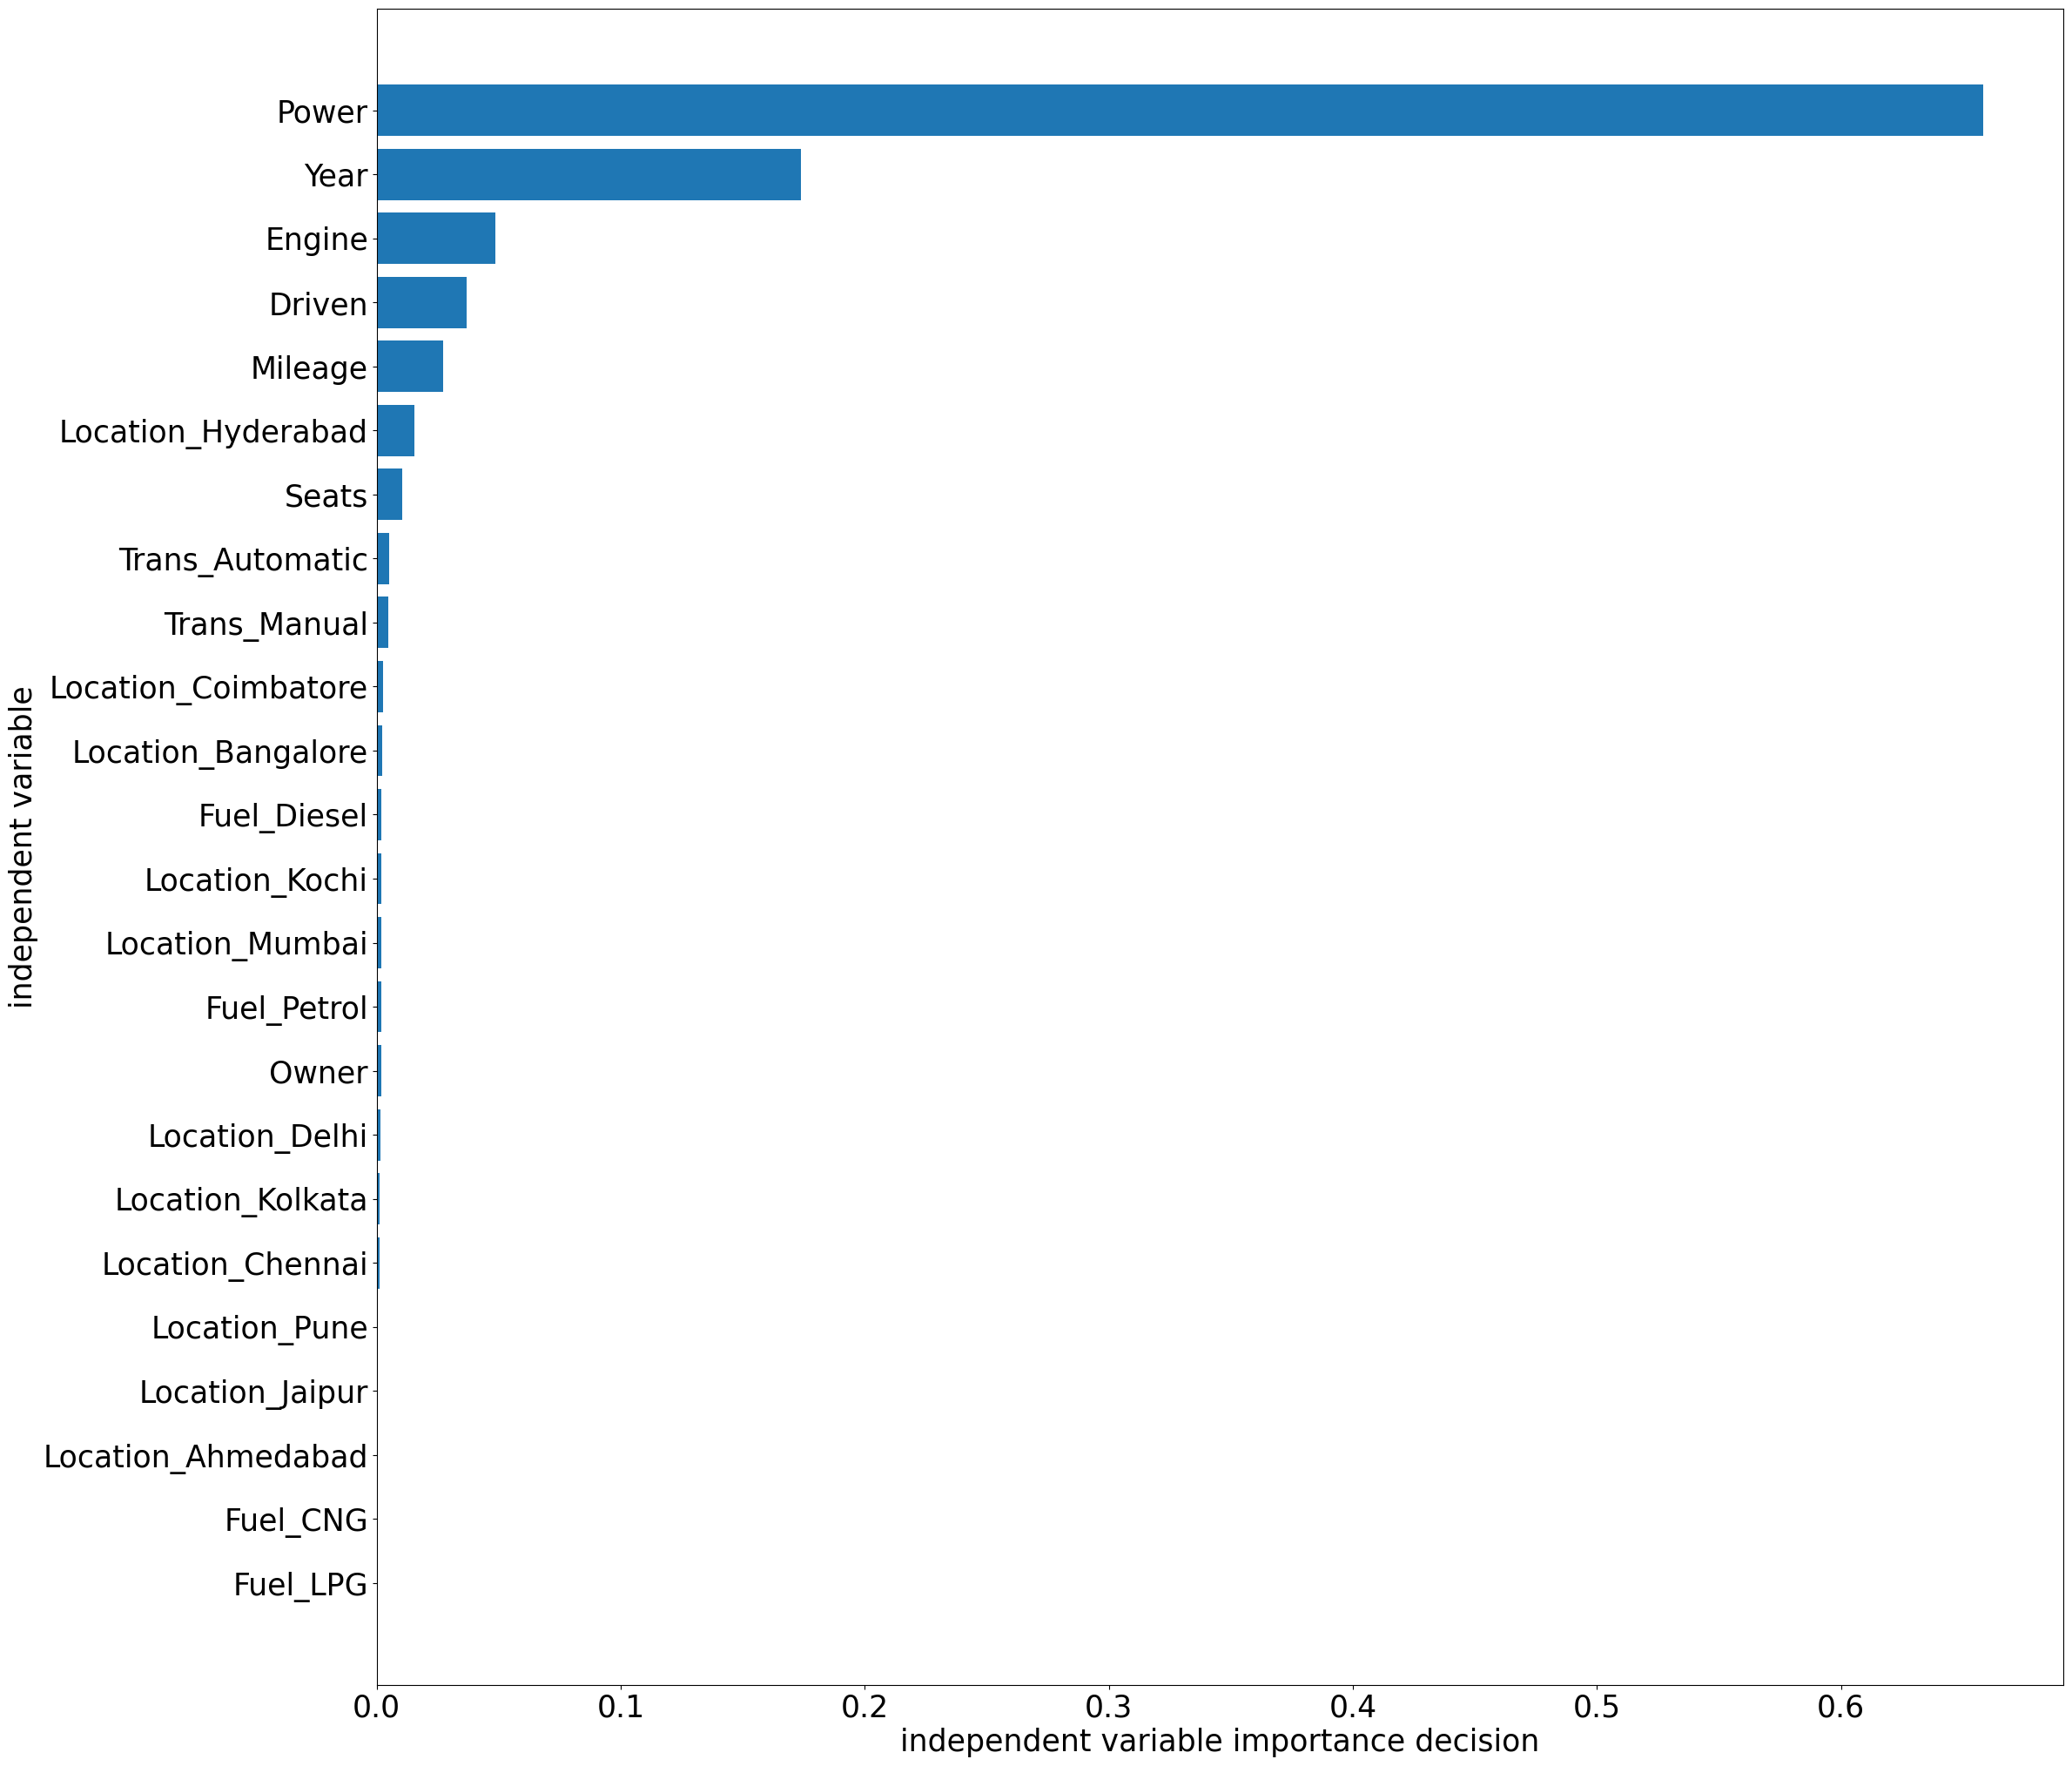

In [79]:
plot_feature_importances(X_train.columns, rf.feature_importances_)

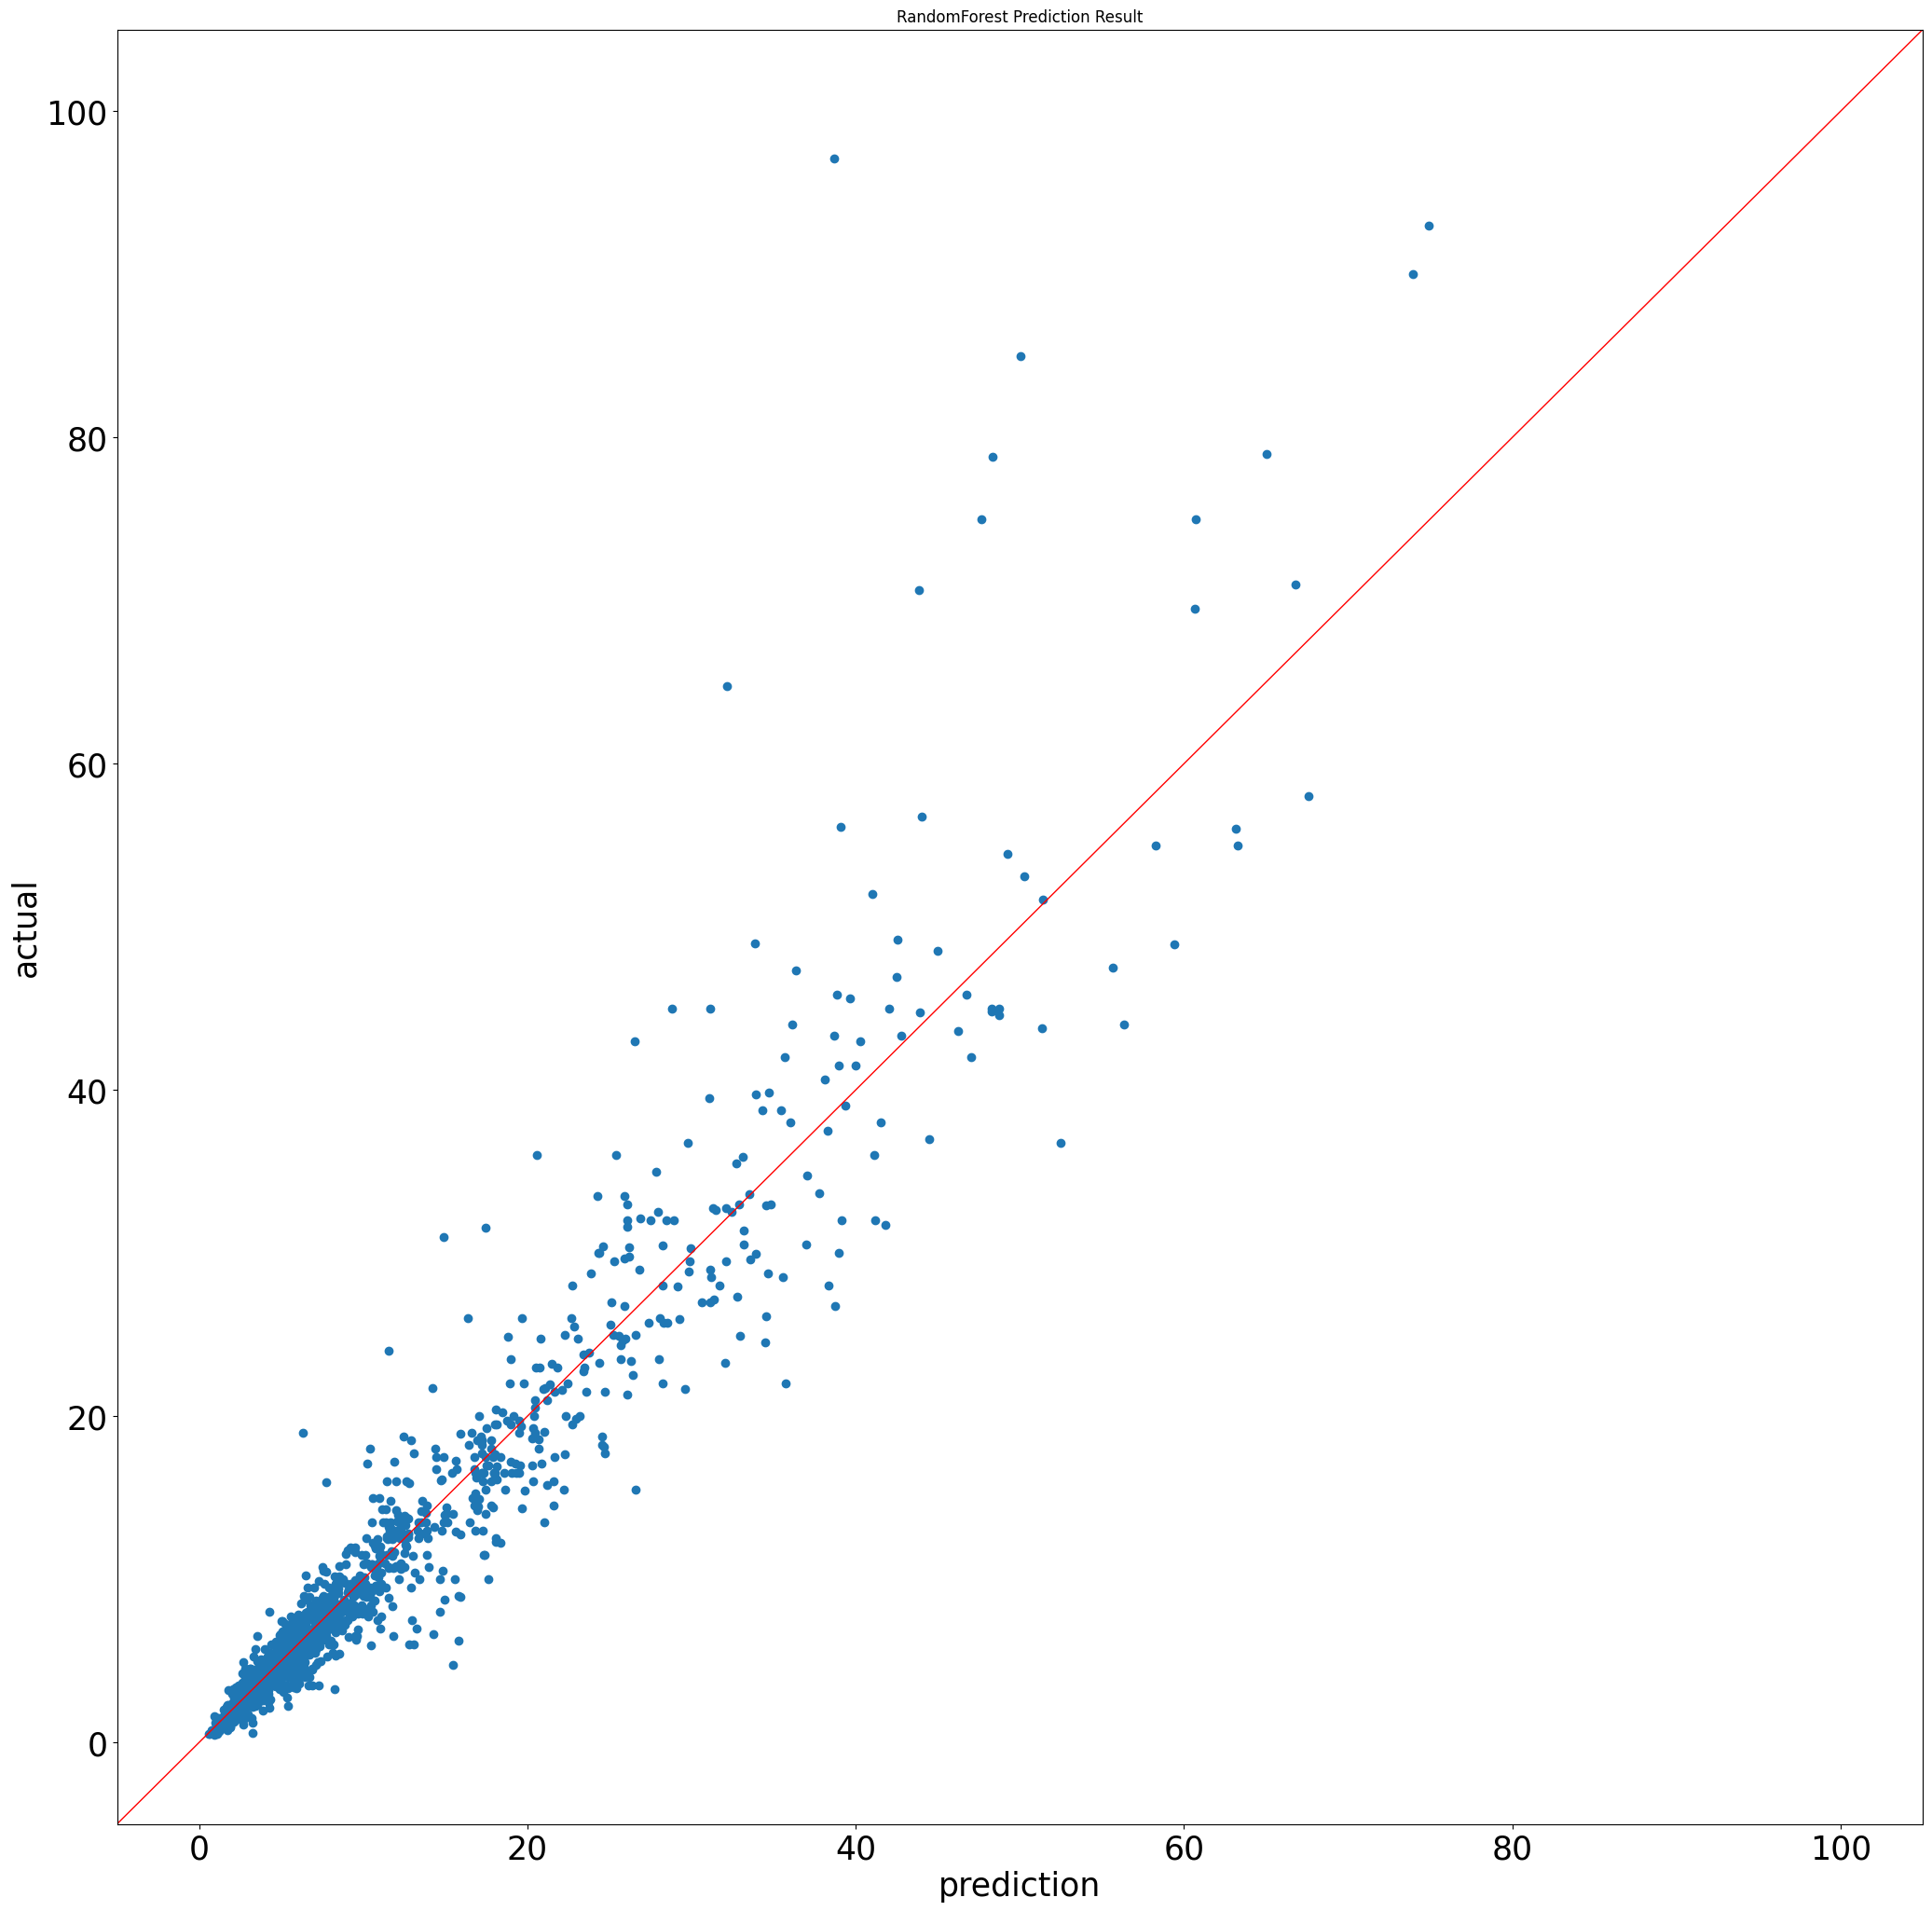

In [80]:
plot_graph(pred_rf, "RandomForest Prediction Result")

## 4-3.Gradient Boost

In [81]:
from sklearn.ensemble import GradientBoostingRegressor

In [82]:
gbr = GradientBoostingRegressor(random_state=10)

In [83]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=10)

In [84]:
pred_gbr = gbr.predict(X_test)

In [85]:
print('Train data Accuracy : ', format(gbr.score(X_train, y_train)))
print('Test data r-square : ', format(gbr.score(X_test, y_test)))
print('Root mean squared error : ', format(mean_squared_error(y_test,pred_gbr, squared = False)))

Train data Accuracy :  0.9331881249908458
Test data r-square :  0.9005560457736879
Root mean squared error :  3.487176305303609


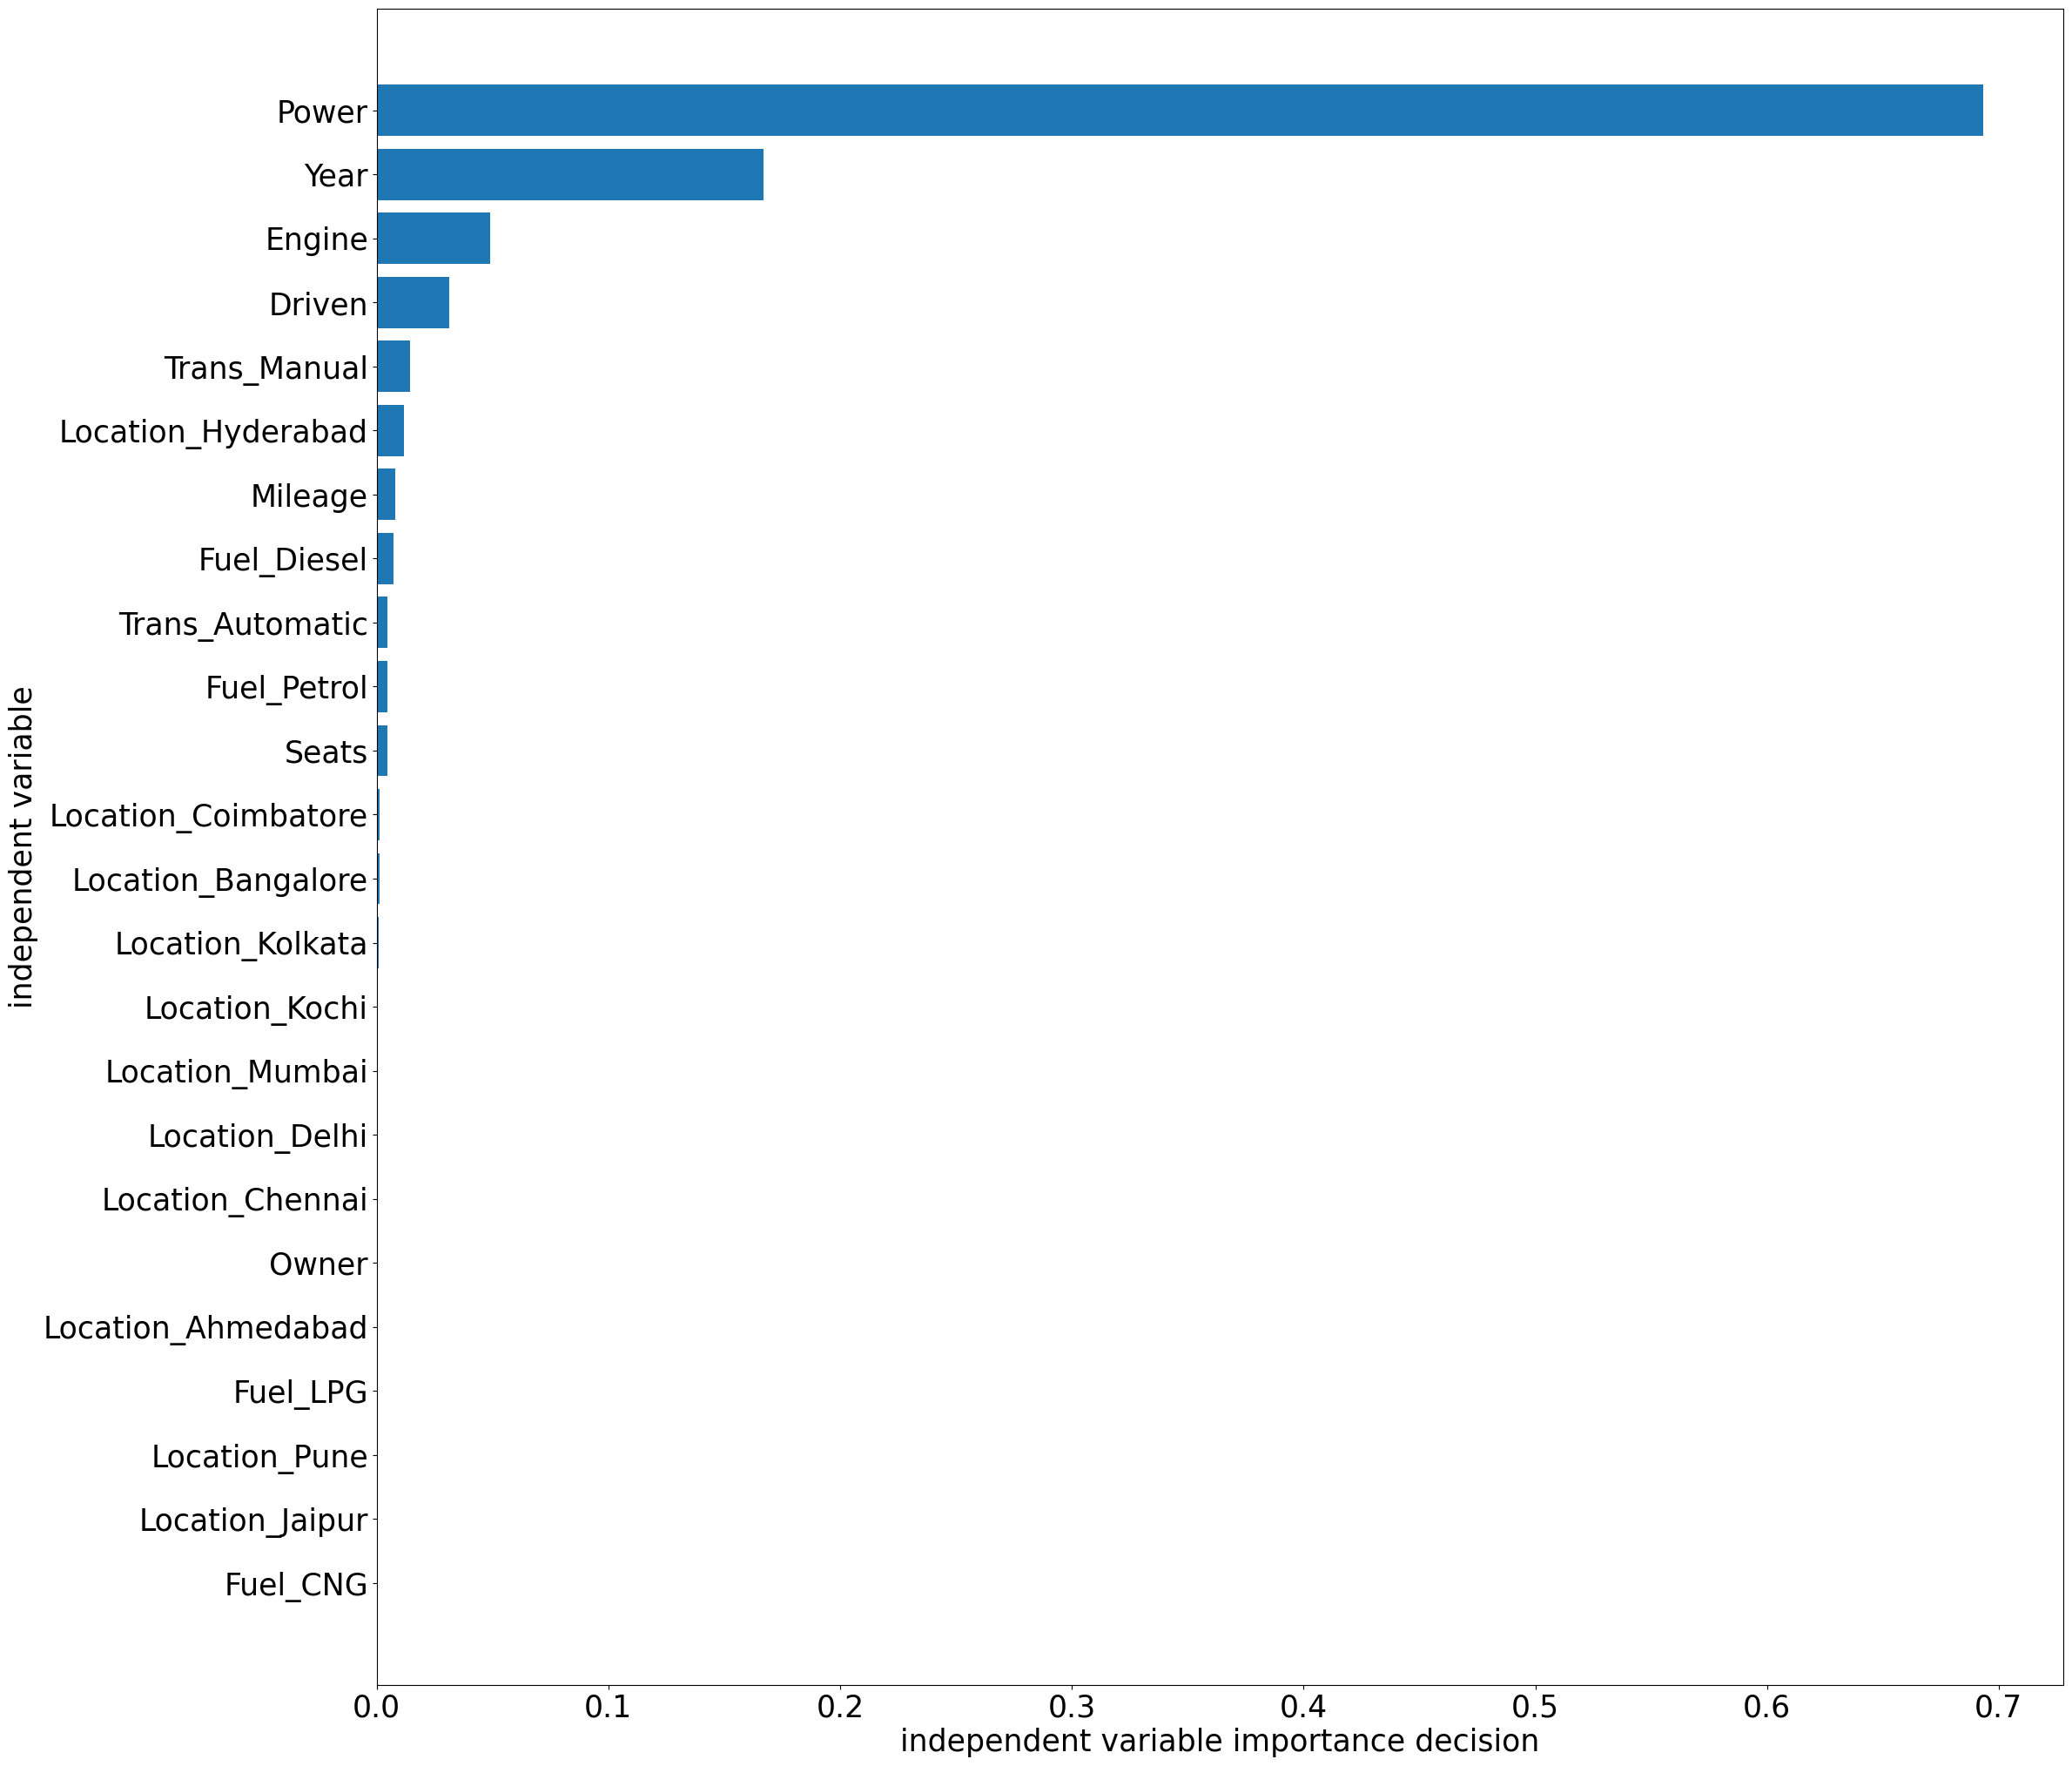

In [86]:
plot_feature_importances(X_train.columns, gbr.feature_importances_)

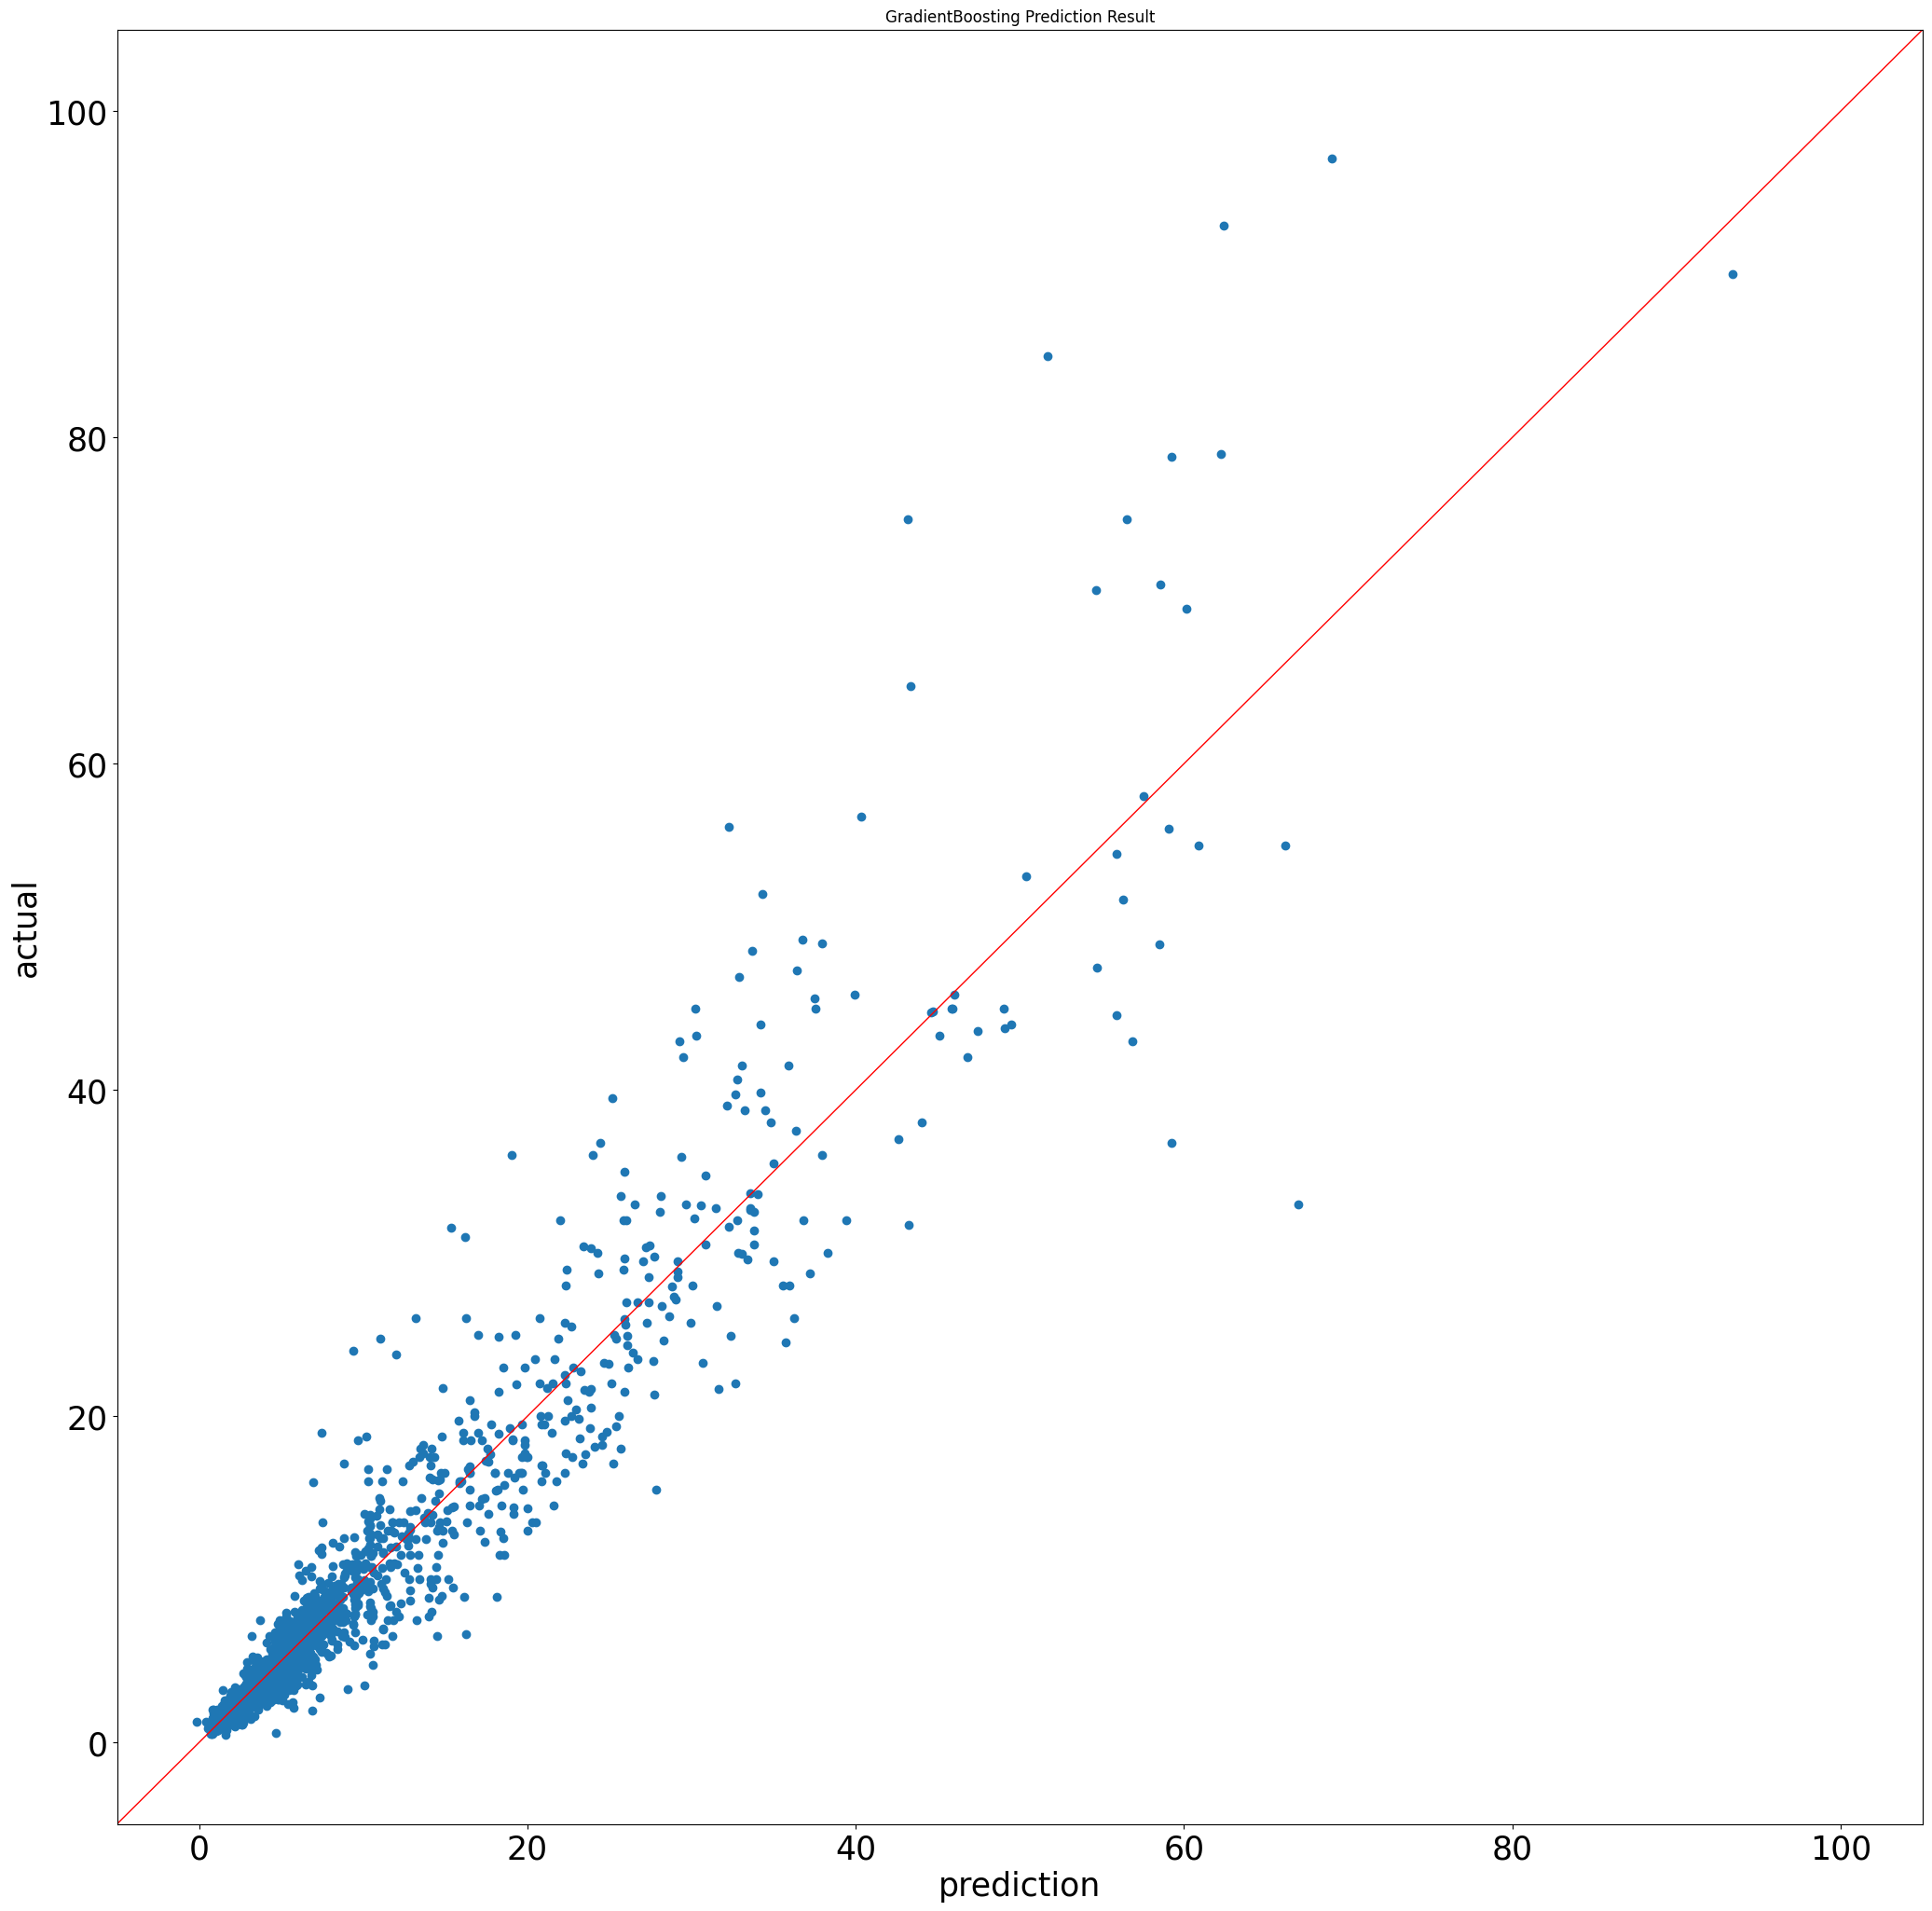

In [87]:
plot_graph(pred_gbr, "GradientBoosting Prediction Result")

## 4-4.XGBoost

In [88]:
from xgboost import XGBRegressor

In [89]:
xgb = XGBRegressor(random_state=10, n_jobs=-1)

In [90]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=10,
             reg_alpha=0, reg_lambda=1, ...)

In [91]:
pred_xgb = xgb.predict(X_test)

In [92]:
print('Train data Accuracy : ', format(xgb.score(X_train, y_train)))
print('Test data r-square : ', format(xgb.score(X_test, y_test)))
print('Root mean squared error : ', format(mean_squared_error(y_test,pred_xgb, squared = False)))

Train data Accuracy :  0.9963899855819375
Test data r-square :  0.9121459109765958
Root mean squared error :  3.2776735952646816


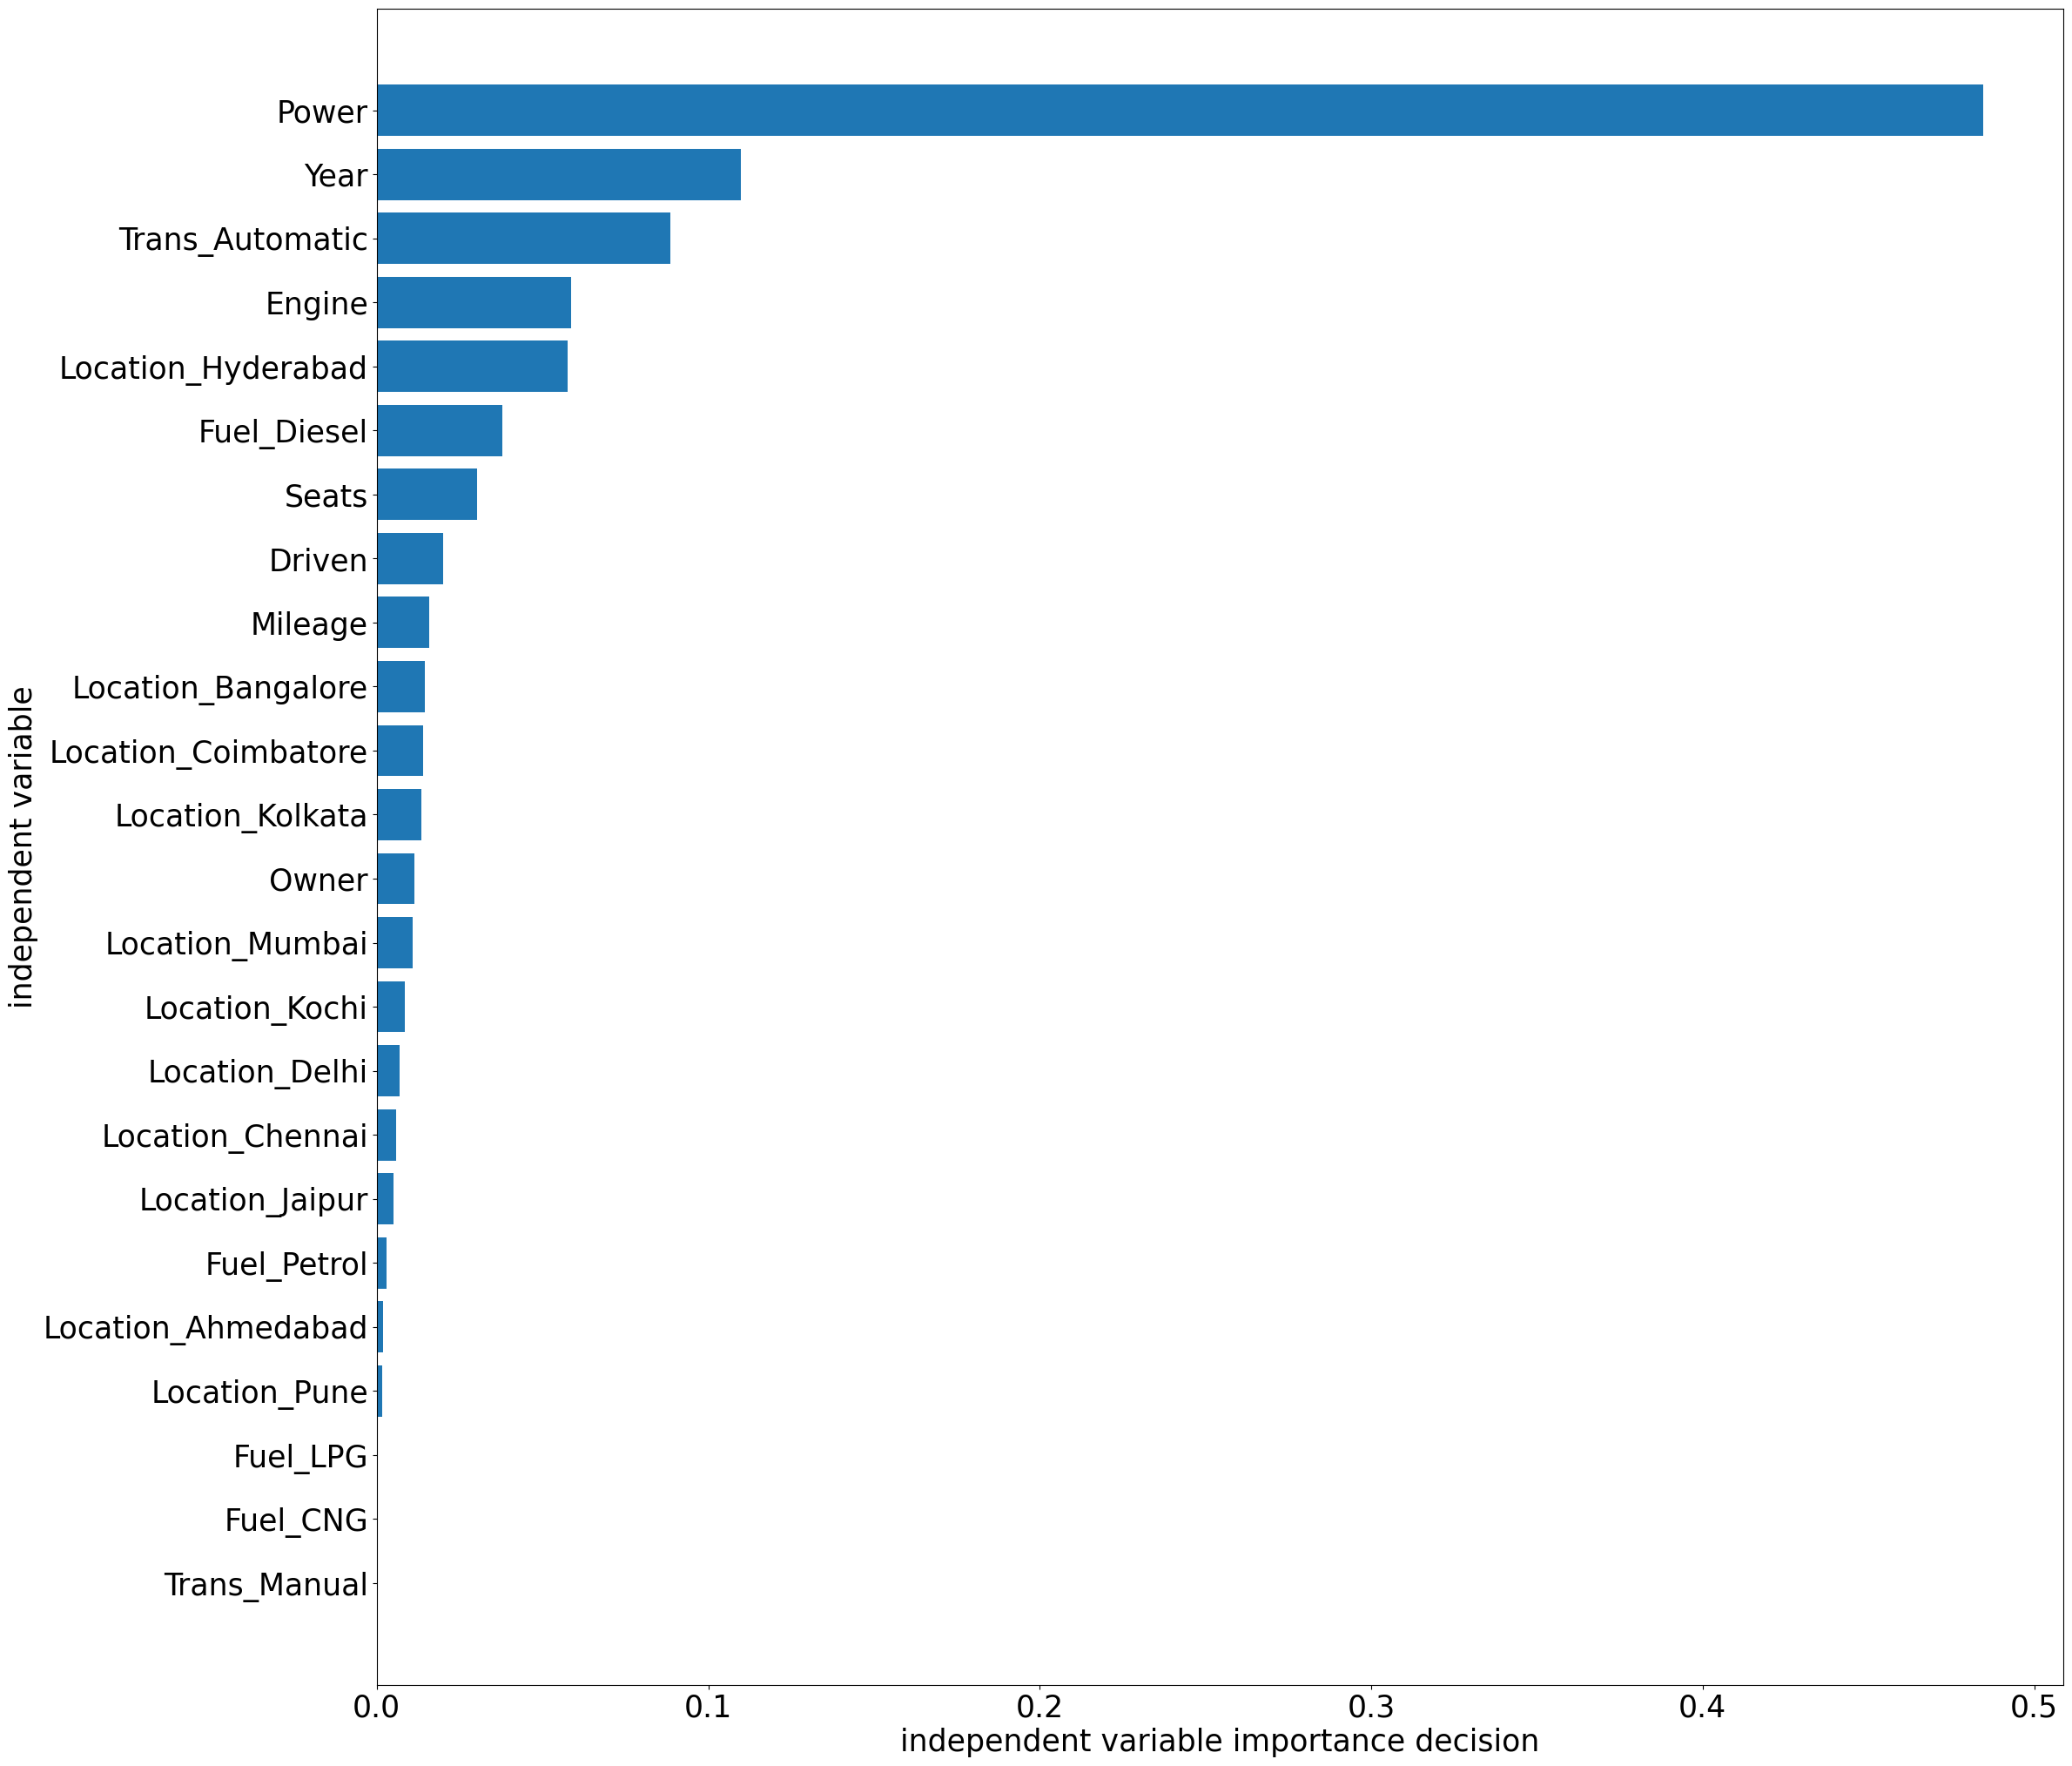

In [93]:
plot_feature_importances(X_train.columns, xgb.feature_importances_)

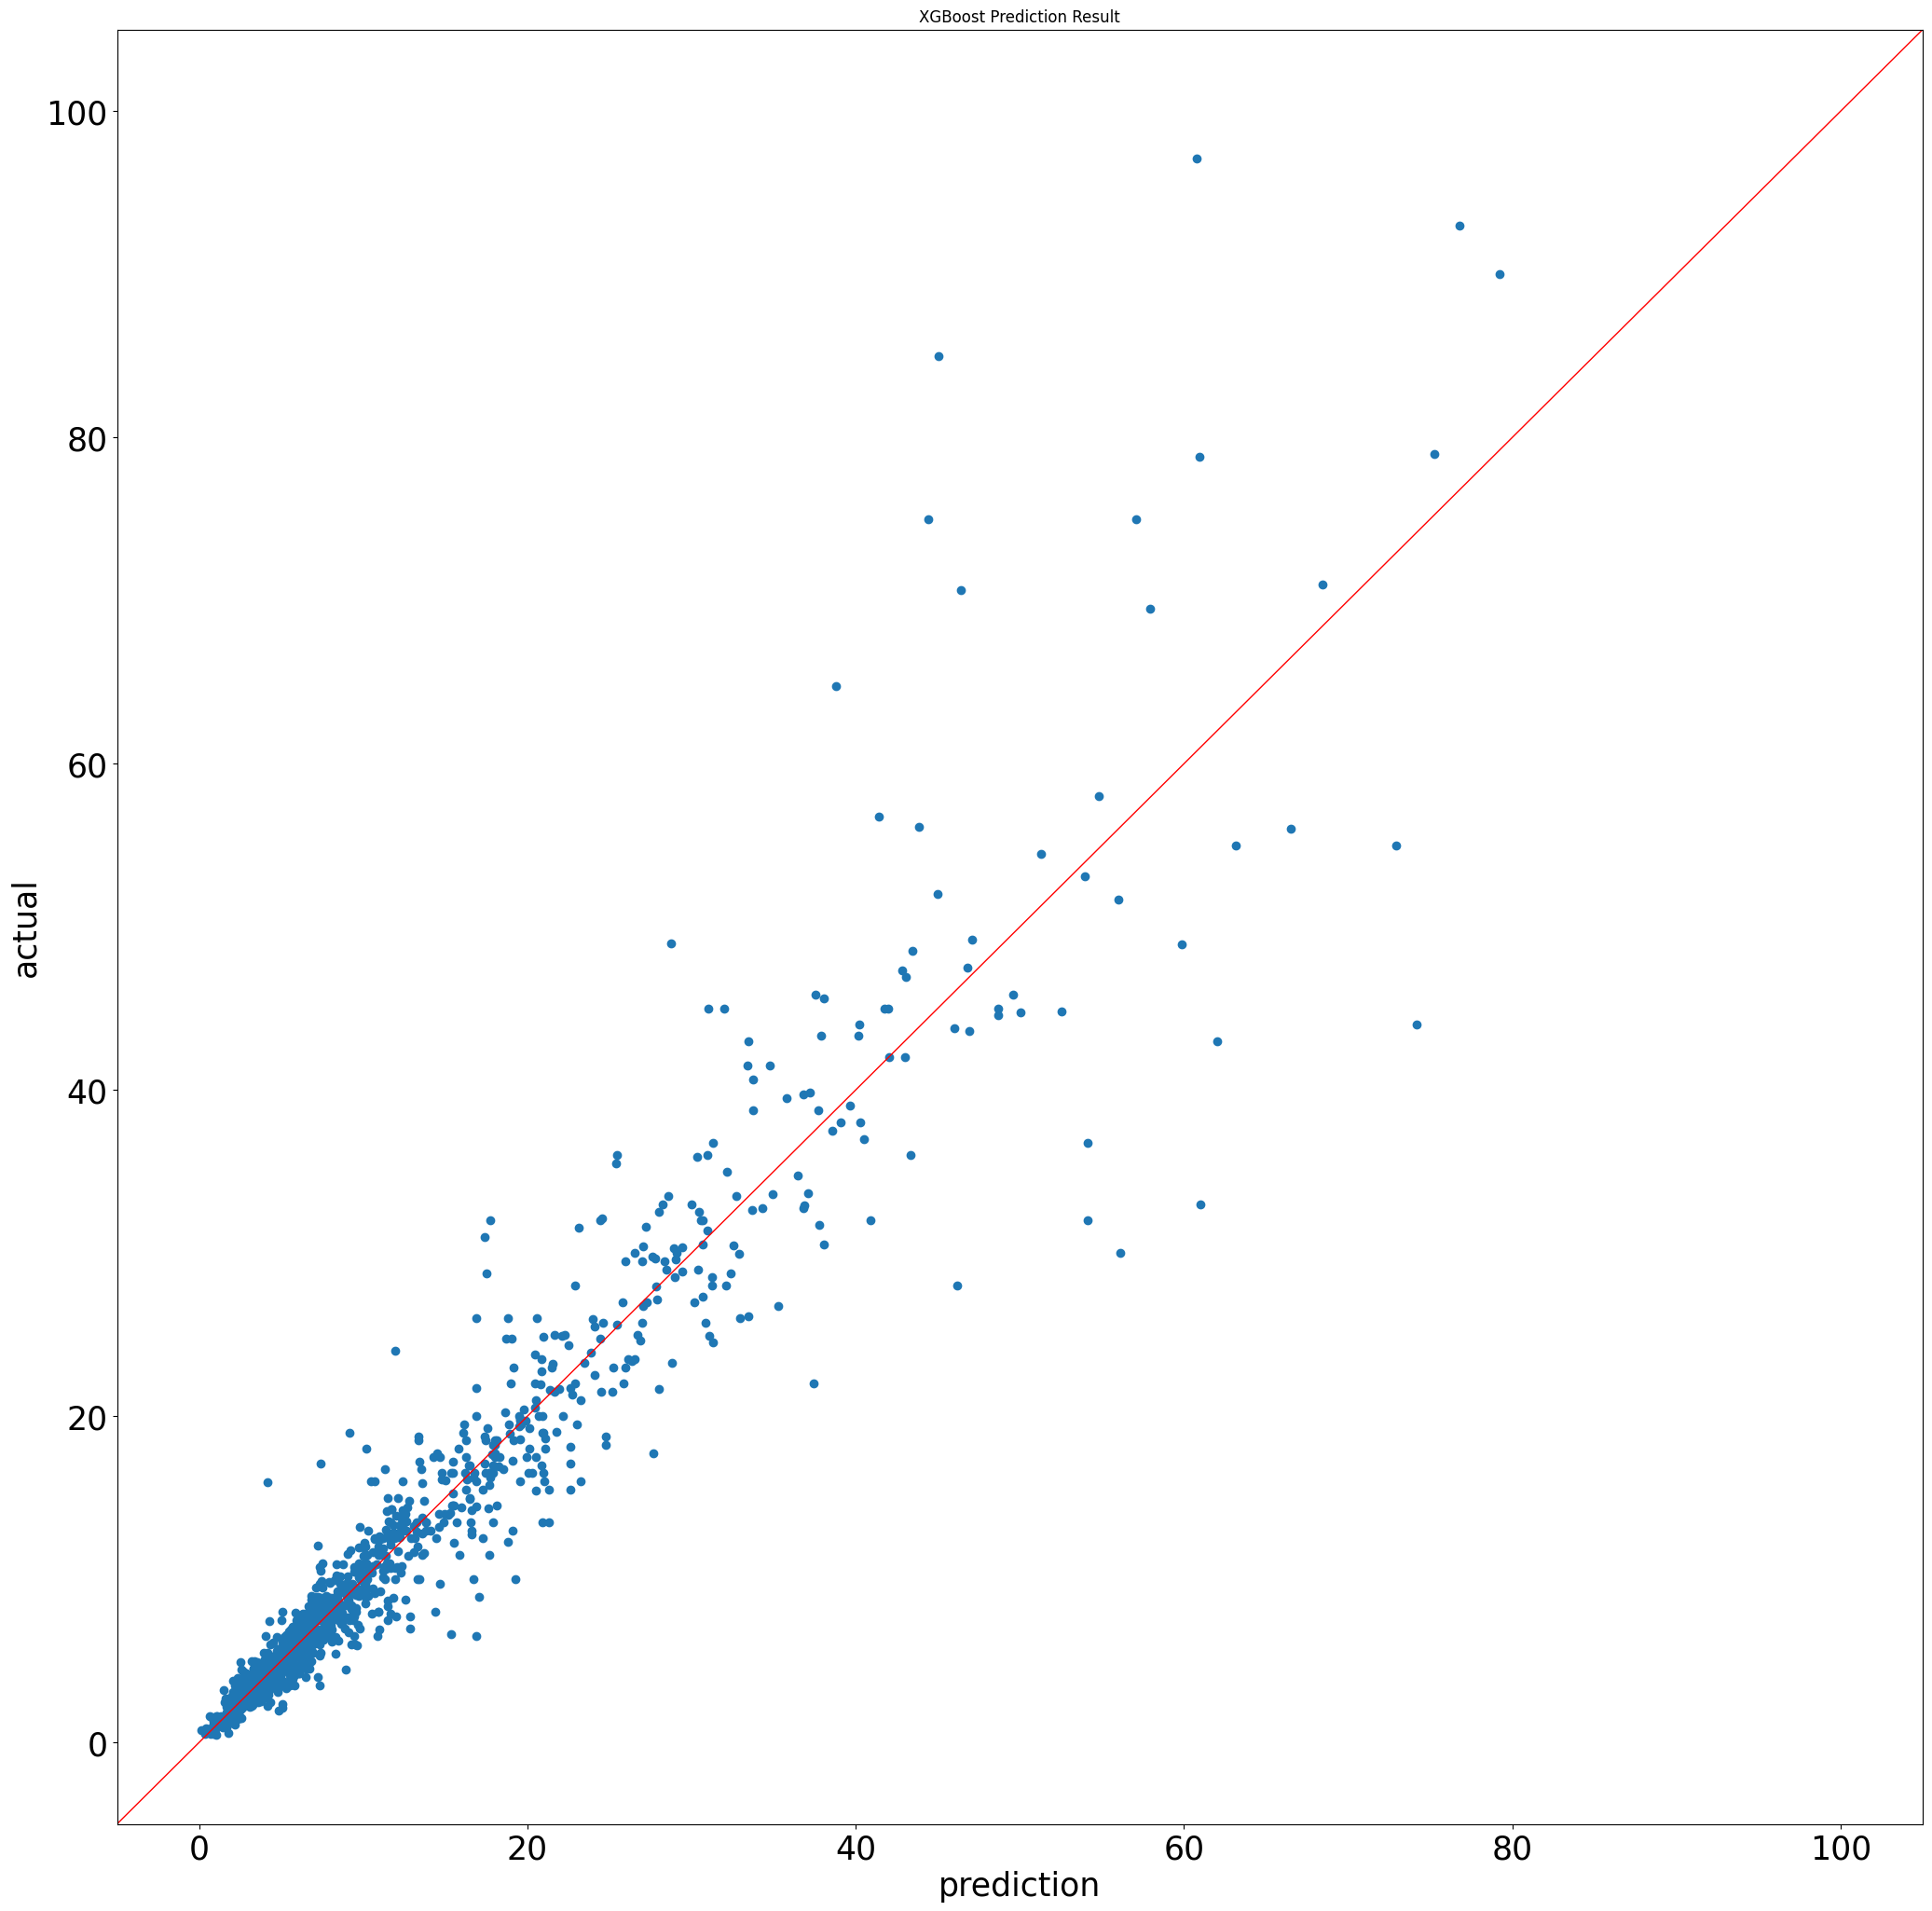

In [94]:
plot_graph(pred_xgb, "XGBoost Prediction Result")

## 4-5.LightGBM

In [95]:
from lightgbm import LGBMRegressor

In [96]:
lgbm = LGBMRegressor(random_state=10, n_jobs=-1)

In [97]:
lgbm.fit(X_train, y_train)

LGBMRegressor(random_state=10)

In [98]:
pred_lgbm = lgbm.predict(X_test)

In [99]:
print('Train data Accuracy : ', format(lgbm.score(X_train, y_train)))
print('Test data r-square : ', format(lgbm.score(X_test, y_test)))
print('Root mean squared error : ', format(mean_squared_error(y_test,pred_lgbm, squared = False)))

Train data Accuracy :  0.9515517128203499
Test data r-square :  0.9270662432820849
Root mean squared error :  2.98640706683201


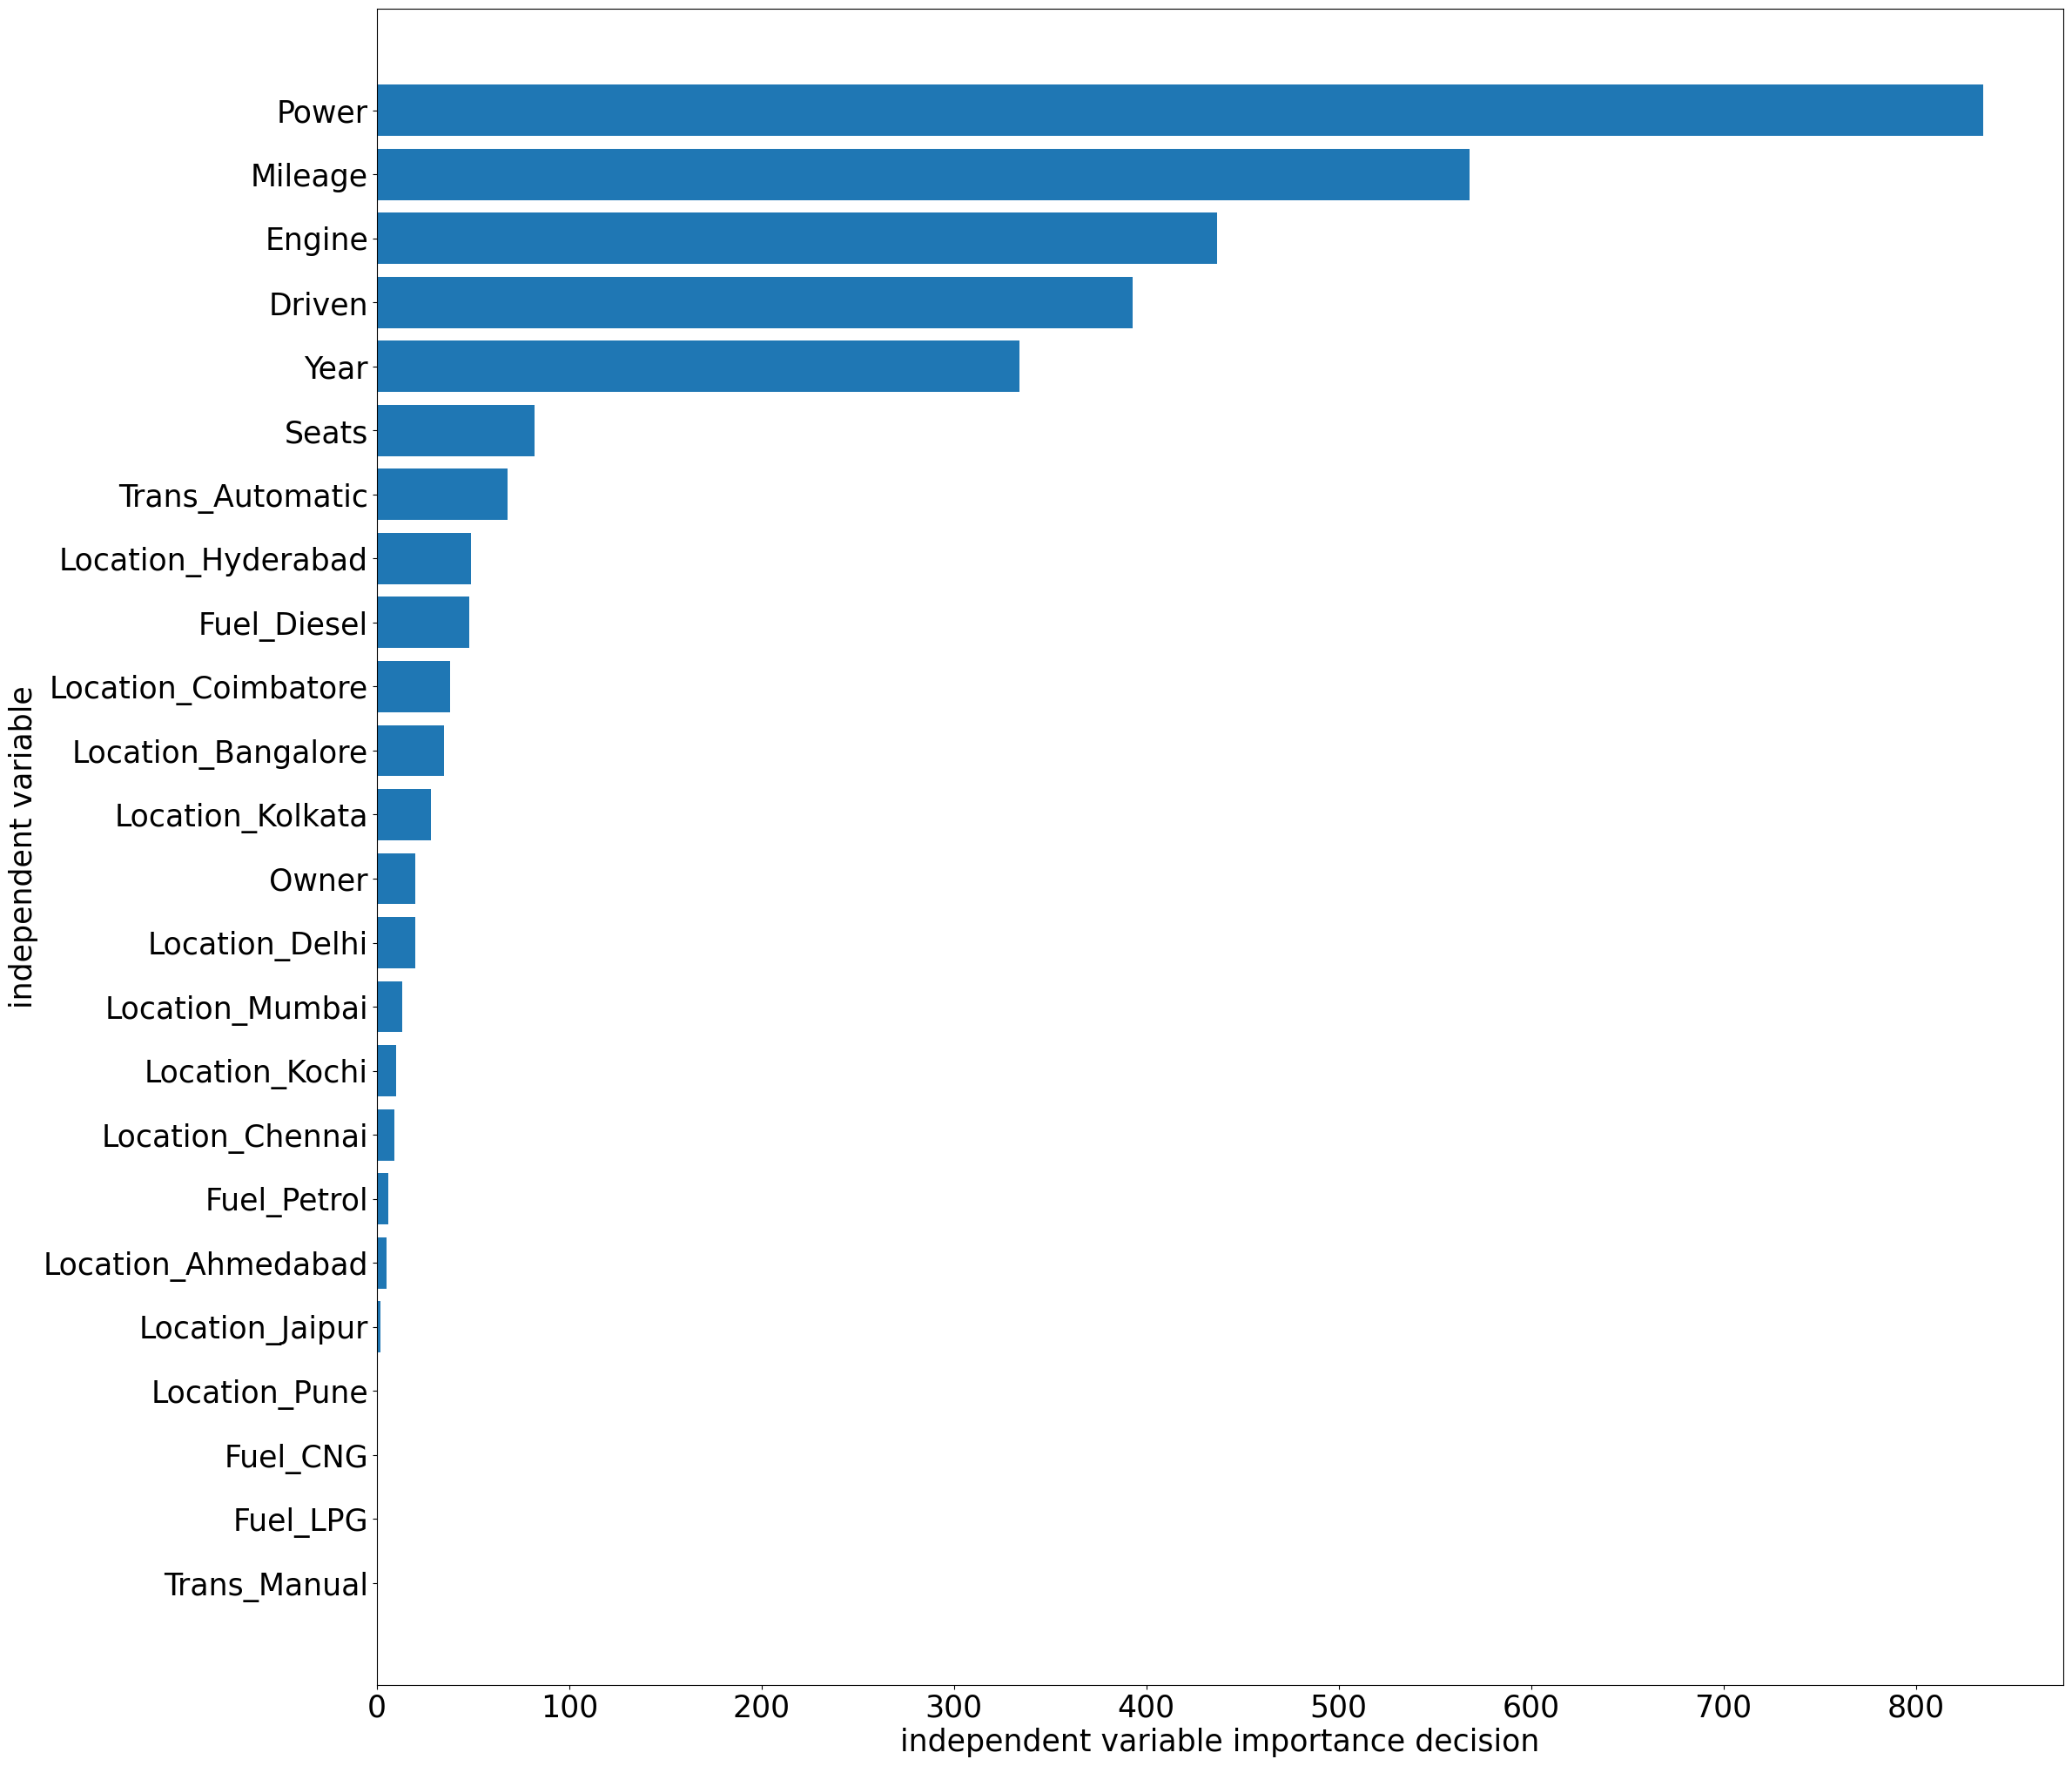

In [100]:
plot_feature_importances(X_train.columns, lgbm.feature_importances_)

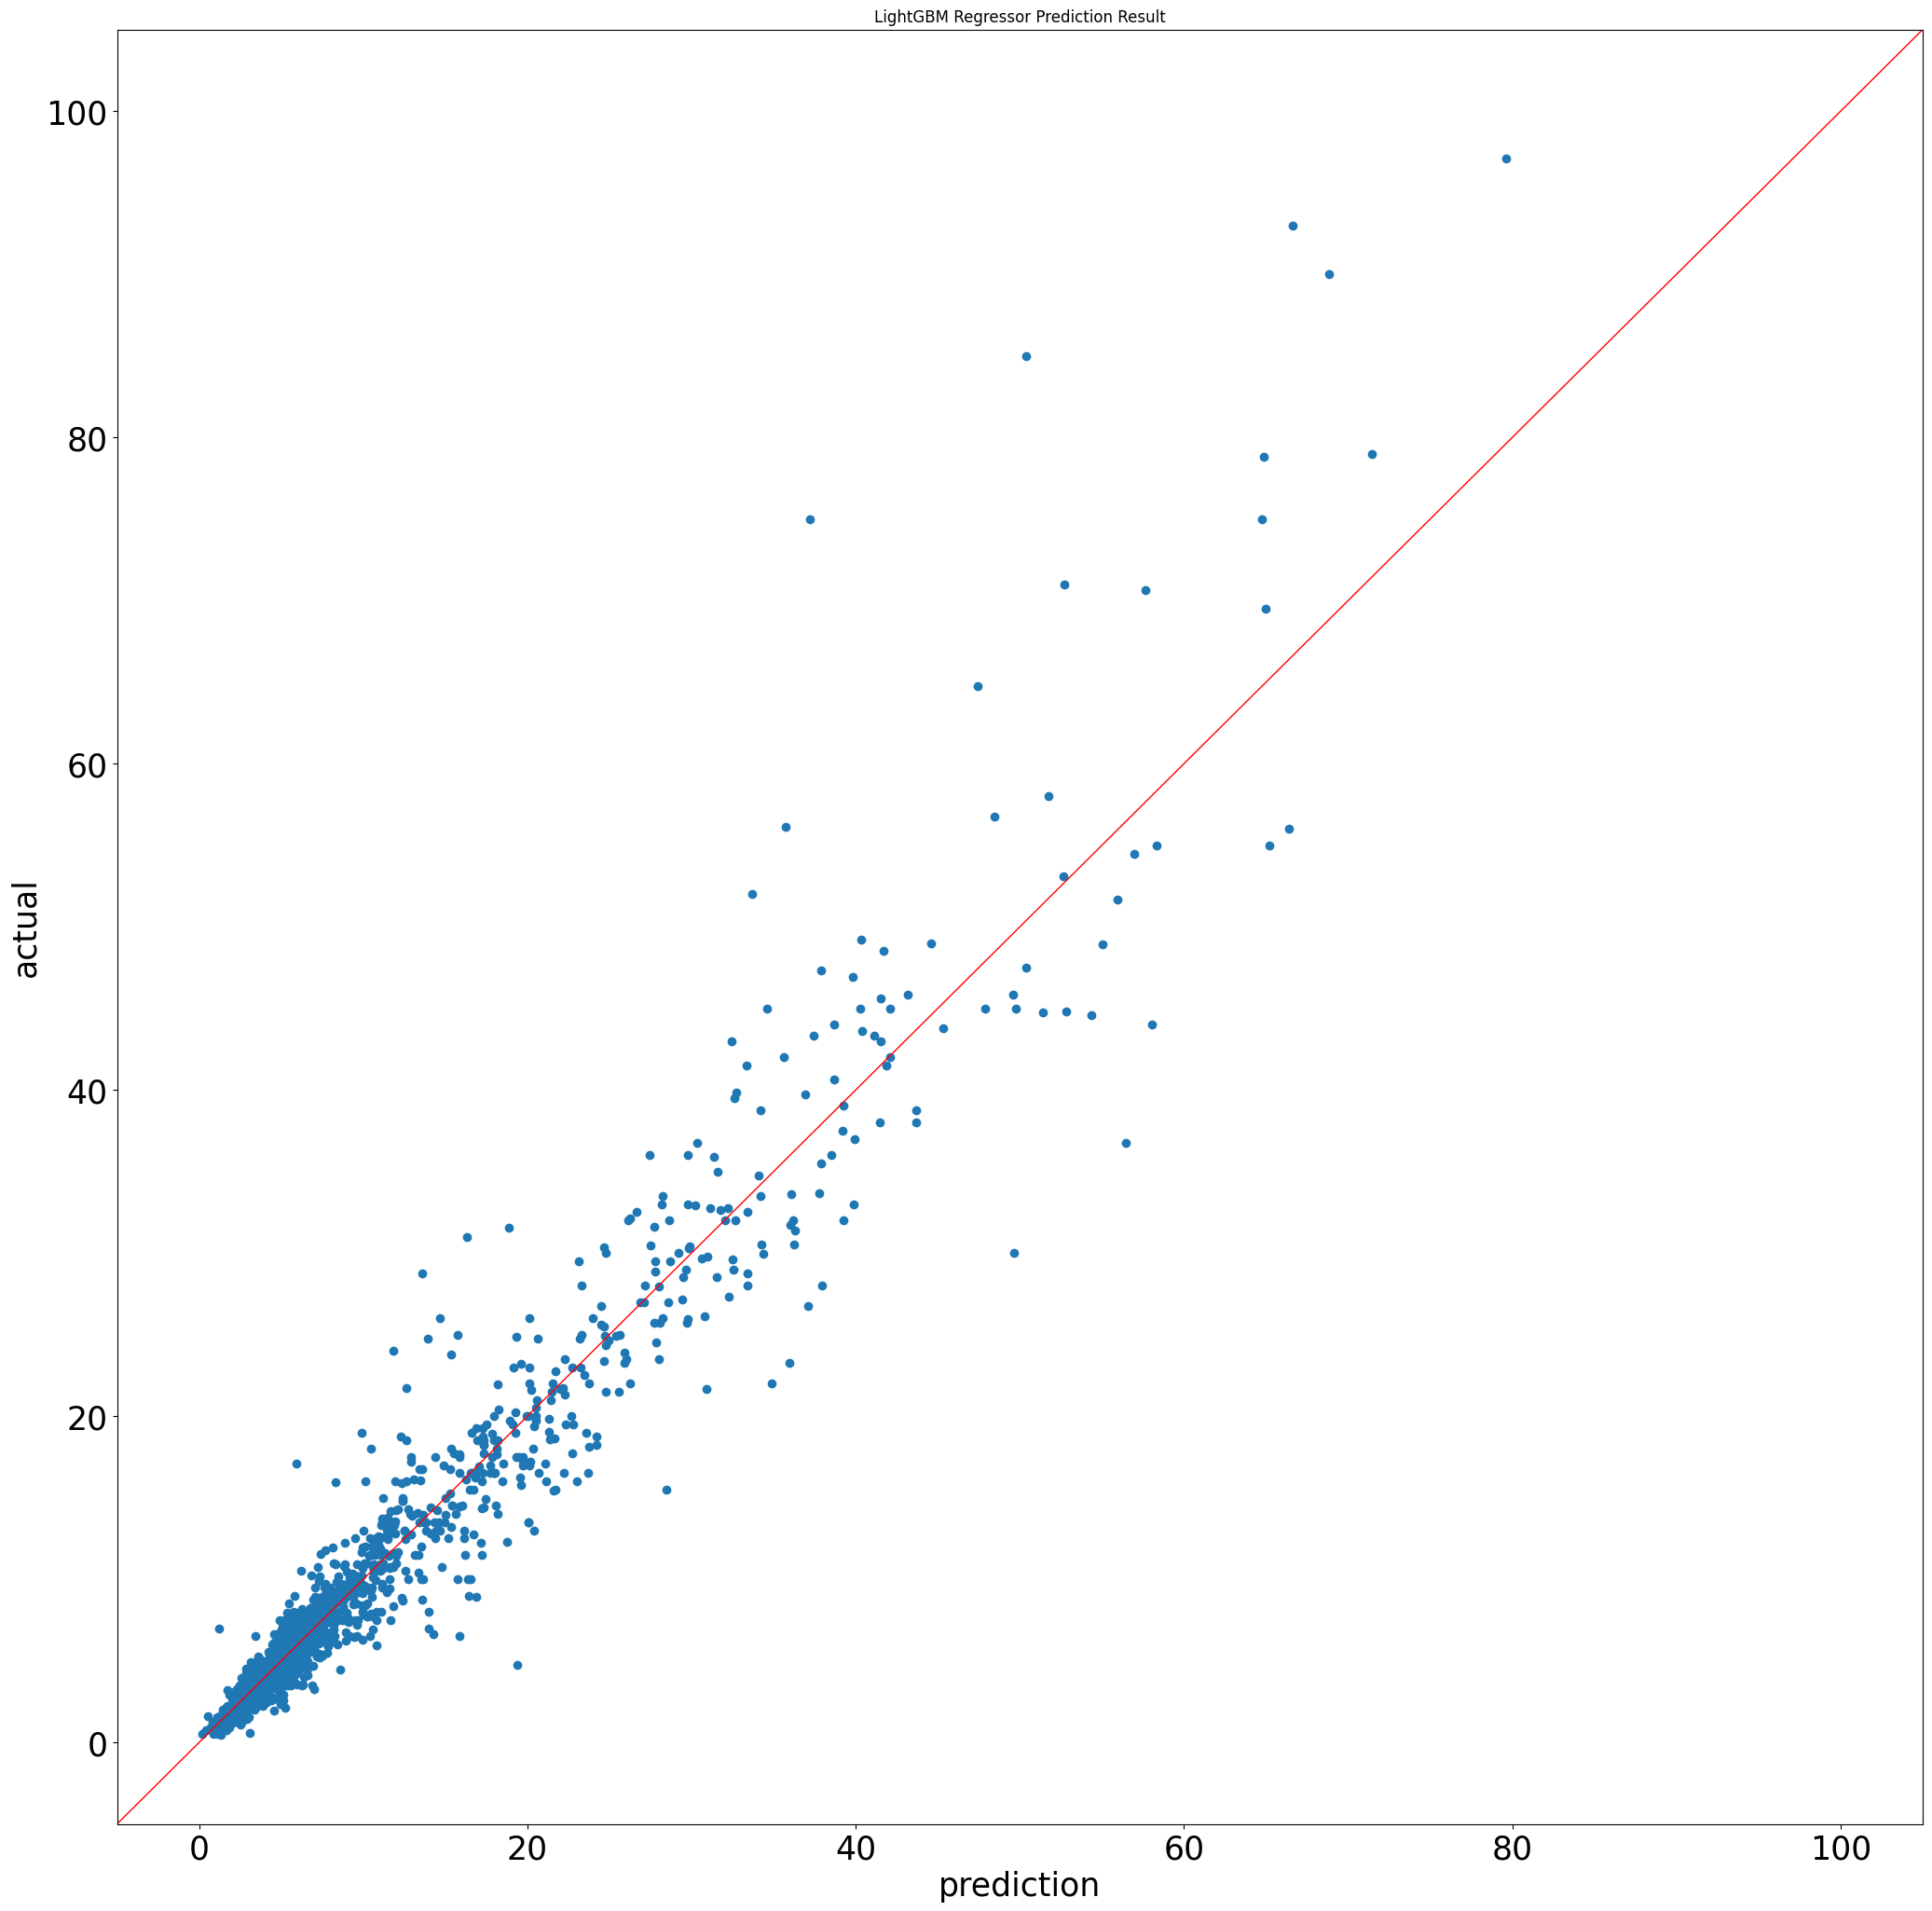

In [101]:
plot_graph(pred_lgbm, "LightGBM Regressor Prediction Result")

# 5.결과 분석

## 5-1.결과가 제일 좋은 모델

### LightGBM

## 5-2.Statsmodels

In [102]:
import statsmodels.api as sm

In [103]:
ols_reg = sm.OLS(y_train, X_train).fit()
ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     476.2
Date:                Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:06:36   Log-Likelihood:                -13265.
No. Observations:                4110   AIC:                         2.657e+04
Df Residuals:                    4088   BIC:                         2.671e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Year                    0.8690      0.041     21.259      0.000       0.789       0.949
Driven              -3.261e-05   3.42e-06     -9.537      0.000   -3.93e-05   -2.59e-05
Mileage                -0.2080      0.036     -5.735      0.000      -0.279      -0.137
Engine                  0.0007      0.000      1.483      0.138      -0.000       0.002
Power                   0.1251      0.005     26.510      0.000       0.116       0.134
Seats                  -0.9545      0.162     -5.897      0.000      -1.272      -0.637
Owner                  -0.2625      0.237     -1.106      0.269      -0.728       0.203
Location_Ahmedabad   -189.4297      8.870    -21.355      0.000    -206.821    -172.039
Location_Bangalore   -186.8197      8.873    -21.056      0.000    -204.215    -169.425
Location_Chennai     -187.5180      8.864    -21.154      0.000    -204.897    -170.139
Location_Coimbatore  -186.8181      8.940    -20.897      0.000    -204.345    -169.291
Location_Delhi       -189.2023      8.874    -21.322      0.000    -206.600    -171.805
Location_Hyderabad   -186.7549      8.863    -21.072      0.000    -204.130    -169.380
Location_Jaipur      -187.7281      8.871    -21.162      0.000    -205.120    -170.336
Location_Kochi       -188.9748      8.935    -21.150      0.000    -206.493    -171.457
Location_Kolkata     -190.4480      8.840    -21.544      0.000    -207.779    -173.117
Location_Mumbai      -189.7419      8.861    -21.413      0.000    -207.115    -172.369
Location_Pune        -188.0946      8.875    -21.193      0.000    -205.495    -170.694
Fuel_CNG             -514.2293     24.334    -21.132      0.000    -561.937    -466.522
Fuel_Diesel          -518.3953     24.478    -21.178      0.000    -566.385    -470.405
Fuel_LPG             -517.4043     24.444    -21.167      0.000    -565.327    -469.481
Fuel_Petrol          -521.5013     24.450    -21.329      0.000    -569.436    -473.566
Trans_Automatic     -1034.6297     48.812    -21.196      0.000   -1130.327    -938.932
Trans_Manual        -1036.9005     48.790    -21.252      0.000   -1132.555    -941.246
==============================================================================
Omnibus:                     3381.392   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           389770.119
Skew:                           3.271   Prob(JB):                         0.00
Kurtosis:                      50.257   Cond. No.                     2.31e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.48e-28. This might indicate that there are
strong multicollinearity problems or that the design matr

## 5-3.가격 예측

In [104]:
def get_car_price_lr(car):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    pred_lr = lr.predict(car)
    return(pred_lr)

In [105]:
def get_car_price_rf(car):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    pred_rf = rf.predict(car)
    return(pred_rf)

In [106]:
def get_car_price_lgbm(car):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

    lgbm = LGBMRegressor()
    lgbm.fit(X_train, y_train)

    pred_lgbm = lgbm.predict(car)
    return(pred_lgbm)

In [107]:
def get_Brand_df(Brand):
    car = data[data['Brand'] == Brand]
    car.reset_index(drop=True, inplace=True)
    
    return(car)

### 현대차 가격 예측

In [108]:
data.loc[data['Brand'] == 'Hyundai']

,Year,Driven,Mileage,Engine,Power,Seats,Price,Brand,Owner,Location_Ahmedabad,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Trans_Automatic,Trans_Manual
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,Hyundai,1,0,...,0,0,0,1,0,1,0,0,0,1
5,2012,75000,27.43,814.0,55.20,5.0,2.35,Hyundai,1,0,...,0,0,0,0,0,0,1,0,0,1
23,2010,45807,18.50,1197.0,80.00,5.0,1.87,Hyundai,1,0,...,0,1,0,0,0,0,0,1,0,1
43,2014,35487,18.50,1197.0,82.90,5.0,4.74,Hyundai,1,0,...,1,0,0,0,0,0,0,1,0,1
44,2014,46374,14.62,1999.0,149.92,5.0,8.85,Hyundai,1,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5986,2005,100000,15.30,1341.0,83.00,5.0,0.85,Hyundai,2,0,...,0,0,0,0,0,0,0,1,0,1
5993,2014,55619,16.30,1797.0,147.50,5.0,8.30,Hyundai,1,0,...,0,0,1,0,0,0,0,1,0,1
6000,2014,68010,18.50,1197.0,82.85,5.0,5.25,Hyundai,2,0,...,0,0,0,0,0,0,0,1,0,1
6004,2007,66800,15.30,1341.0,83.00,5.0,2.20,Hyundai,1,0,...,0,0,0,0,0,0,0,1,0,1


In [109]:
# 현재 가격 : 2.35

Hcar = np.array([[2012, 75000, 27.43, 814.0, 55.2, 
                 5.0, 1, 0, 0, 
                 0, 0, 0, 1, 0, 
                 0, 0, 0, 0, 0,
                 0, 1, 0 ,0, 1]])

- Year : 2012
- Driven : 75000
- Mileage : 27.43
- Engine : 814.0
- Power : 55.2
- Seats : 5.0
- Owner: 1
- Location_Ahmedabad : 0
- Location_Bangalore : 0
- Location_Chennai : 0
- Location_Coimbatore : 0
- Location_Delhi : 0
- Location_Hyderabad : 1
- Location_Jaipur : 0
- Location_Kochi : 0
- Location_Kolkata : 0
- Location_Mumbai : 0 
- Location_Pune : 0
- Fuel_CNG : 0
- Fuel_Diesel : 0
- Fuel_LPG : 1
- Fuel_Petrol : 0
- Trans_Automatic : 0
- Trans_Manual : 1

In [110]:
# 예측가격

# 일반

# LinearRegression : 1.485
# RandomForest : 2.731
# LightGBM : 3.126

X = get_Brand_df('Hyundai').drop(['Price', 'Brand'], axis = 1)
y = get_Brand_df('Hyundai')['Price']

print(get_car_price_lr(Hcar))
print(get_car_price_rf(Hcar))
print(get_car_price_lgbm(Hcar))

[1.48521646]
[2.6358]
[3.1261156]


### 포르쉐 가격 예측

In [111]:
data.loc[data['Brand'] == 'Porsche']

,Year,Driven,Mileage,Engine,Power,Seats,Price,Brand,Owner,Location_Ahmedabad,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Trans_Automatic,Trans_Manual
70,2008,73000,8.50,4806.0,500.0,5.0,14.50,Porsche,1,0,...,0,0,1,0,0,0,0,1,1,0
1078,2015,10512,8.60,2706.0,265.0,2.0,64.00,Porsche,1,0,...,0,1,0,0,0,0,0,1,1,0
1755,2013,70000,15.15,2967.0,240.0,5.0,40.00,Porsche,1,0,...,0,0,1,0,0,1,0,0,1,0
2100,2010,35000,11.90,4806.0,550.0,5.0,32.00,Porsche,2,0,...,0,0,1,0,0,0,0,1,1,0
2659,2015,25100,17.85,2967.0,300.0,4.0,75.00,Porsche,1,0,...,0,1,0,0,0,1,0,0,1,0
2706,2014,60033,18.18,2967.0,250.0,4.0,51.52,Porsche,1,0,...,1,0,0,0,0,1,0,0,1,0
2896,2013,48000,17.85,2967.0,300.0,4.0,50.50,Porsche,2,0,...,0,0,0,0,0,1,0,0,1,0
2978,2010,42400,8.00,4806.0,394.3,4.0,42.91,Porsche,3,0,...,0,0,0,0,0,0,0,1,1,0
3132,2019,14298,13.33,2995.0,340.0,5.0,2.02,Porsche,1,0,...,1,0,0,0,0,0,0,1,1,0
3489,2013,19828,17.85,2967.0,300.0,4.0,75.00,Porsche,2,0,...,0,0,0,0,0,1,0,0,1,0


In [112]:
# 현재 가격 : 64.0

data.loc[data['Brand'] == 'Porsche'].iloc[1]

Year                      2015
Driven                   10512
Mileage                    8.6
Engine                  2706.0
Power                    265.0
Seats                      2.0
Price                     64.0
Brand                  Porsche
Owner                        1
Location_Ahmedabad           0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             1
Location_Mumbai              0
Location_Pune                0
Fuel_CNG                     0
Fuel_Diesel                  0
Fuel_LPG                     0
Fuel_Petrol                  1
Trans_Automatic              1
Trans_Manual                 0
Name: 1078, dtype: object

In [113]:
Pcar = np.array([[2015, 10512, 8.6, 2706.0, 265.0, 
                 2.0, 1, 0, 0, 
                 0, 0, 0, 0, 0, 
                 0, 1, 0, 0, 0,
                 0, 0, 1 ,1, 0]])

- Year : 2015
- Driven : 10512
- Mileage : 8.6
- Engine : 2706.0
- Power : 265.0
- Seats : 2.0
- Owner: 1
- Location_Ahmedabad : 0
- Location_Bangalore : 0
- Location_Chennai : 0
- Location_Coimbatore : 0
- Location_Delhi : 0
- Location_Hyderabad : 0
- Location_Jaipur : 0
- Location_Kochi : 0
- Location_Kolkata : 1
- Location_Mumbai : 0 
- Location_Pune : 0
- Fuel_CNG : 0
- Fuel_Diesel : 0
- Fuel_LPG : 0
- Fuel_Petrol : 1
- Trans_Automatic : 1
- Trans_Manual : 0

In [114]:
# 예측가격

# 일반

# LinearRegression : 64
# RandomForest : 54.304
# LightGBM : 48.940

X = get_Brand_df('Porsche').drop(['Price', 'Brand'], axis = 1)
y = get_Brand_df('Porsche')['Price']

print(get_car_price_lr(Pcar))
print(get_car_price_rf(Pcar))
print(get_car_price_lgbm(Pcar))

[64.]
[52.2067]
[48.94000032]


### BMW 가격 예측

In [115]:
data.loc[data['Brand'] == 'BMW']

,Year,Driven,Mileage,Engine,Power,Seats,Price,Brand,Owner,Location_Ahmedabad,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Trans_Automatic,Trans_Manual
20,2014,32982,22.69,1995.0,190.0,5.0,18.55,BMW,1,0,...,1,0,0,0,0,1,0,0,1,0
86,2011,75000,16.73,1995.0,218.0,5.0,13.90,BMW,2,0,...,0,0,0,0,0,1,0,0,1,0
113,2015,56087,22.69,1995.0,190.0,5.0,20.75,BMW,1,0,...,0,0,1,0,0,1,0,0,1,0
118,2009,128000,10.80,2497.0,215.0,5.0,7.00,BMW,1,0,...,0,0,1,0,0,0,0,1,1,0
137,2015,31821,20.58,1995.0,143.0,5.0,17.22,BMW,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5751,2015,30000,18.88,1995.0,184.0,5.0,22.00,BMW,1,0,...,0,0,0,0,0,1,0,0,1,0
5775,2013,30000,17.54,2993.0,313.0,4.0,45.00,BMW,1,0,...,0,0,1,0,0,1,0,0,1,0
5845,2013,35000,16.73,2993.0,218.0,5.0,21.00,BMW,1,0,...,0,0,1,0,0,1,0,0,1,0
5868,2014,51240,8.20,2993.0,245.0,4.0,29.52,BMW,1,0,...,1,0,0,0,0,1,0,0,1,0


In [116]:
# 현재 가격 7.0

data.loc[data['Brand'] == 'BMW'].iloc[3]

Year                     2009
Driven                 128000
Mileage                  10.8
Engine                 2497.0
Power                   215.0
Seats                     5.0
Price                     7.0
Brand                     BMW
Owner                       1
Location_Ahmedabad          0
Location_Bangalore          0
Location_Chennai            0
Location_Coimbatore         0
Location_Delhi              0
Location_Hyderabad          0
Location_Jaipur             0
Location_Kochi              0
Location_Kolkata            0
Location_Mumbai             1
Location_Pune               0
Fuel_CNG                    0
Fuel_Diesel                 0
Fuel_LPG                    0
Fuel_Petrol                 1
Trans_Automatic             1
Trans_Manual                0
Name: 118, dtype: object

In [117]:
Bcar = np.array([[2009, 128000, 10.8, 2497.0, 215.0, 
                 5.0, 1, 0, 0, 
                 0, 0, 0, 0, 0, 
                 0, 0, 1, 0, 0,
                 0, 0, 1 ,1, 0]])

In [118]:
# 예측가격 8.47

# 일반

# LinearRegression : 8.32
# RandomForest : 8.37
# LightGBM : 10.84

X = get_Brand_df('BMW').drop(['Price', 'Brand'], axis = 1)
y = get_Brand_df('BMW')['Price']

print(get_car_price_lr(Bcar))
print(get_car_price_rf(Bcar))
print(get_car_price_lgbm(Bcar))

[8.32183296]
[8.6321]
[10.84866046]


## 5-4.어느 지역에 팔아야 가격을 잘 받을지

In [119]:
X = get_Brand_df('Hyundai').drop(['Price','Brand'], axis=1)
y = get_Brand_df('Hyundai')['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

ols_reg = sm.OLS(y_train, X_train).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     136.8
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          2.36e-234
Time:                        11:06:37   Log-Likelihood:                -1302.5
No. Observations:                 740   AIC:                             2649.
Df Residuals:                     718   BIC:                             2750.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Year                    0.5721      0.024     23.577      0.000       0.524       0.620
Driven              -4.366e-06   1.91e-06     -2.285      0.023   -8.12e-06   -6.14e-07
Mileage                -0.1971      0.027     -7.352      0.000      -0.250      -0.144
Engine                2.02e-05      0.001      0.024      0.981      -0.002       0.002
Power                   0.0620      0.008      7.730      0.000       0.046       0.078
Seats                  -1.0350      0.272     -3.799      0.000      -1.570      -0.500
Owner                  -0.2920      0.144     -2.033      0.042      -0.574      -0.010
Location_Ahmedabad   -123.4716      5.303    -23.282      0.000    -133.883    -113.060
Location_Bangalore   -122.8193      5.299    -23.178      0.000    -133.223    -112.416
Location_Chennai     -123.4009      5.298    -23.293      0.000    -133.802    -113.000
Location_Coimbatore  -122.5312      5.345    -22.925      0.000    -133.025    -112.038
Location_Delhi       -123.9978      5.316    -23.325      0.000    -134.435    -113.561
Location_Hyderabad   -123.3092      5.293    -23.297      0.000    -133.701    -112.918
Location_Jaipur      -123.5713      5.312    -23.261      0.000    -134.001    -113.142
Location_Kochi       -123.5177      5.344    -23.113      0.000    -134.010    -113.026
Location_Kolkata     -124.6345      5.280    -23.605      0.000    -135.000    -114.269
Location_Mumbai      -123.5497      5.300    -23.312      0.000    -133.955    -113.144
Location_Pune        -123.6561      5.304    -23.313      0.000    -134.070    -113.242
Fuel_CNG             -339.3126     14.639    -23.179      0.000    -368.052    -310.573
Fuel_Diesel          -339.2451     14.610    -23.221      0.000    -367.928    -310.562
Fuel_LPG             -339.3032     14.585    -23.265      0.000    -367.937    -310.670
Fuel_Petrol          -340.5984     14.586    -23.351      0.000    -369.235    -311.962
Trans_Automatic      -679.1694     29.183    -23.273      0.000    -736.463    -621.876
Trans_Manual         -679.2899     29.180    -23.279      0.000    -736.578    -622.002
==============================================================================
Omnibus:                      114.650   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.716
Skew:                           0.843   Prob(JB):                     5.43e-58
Kurtosis:                       5.389   Cond. No.                     4.90e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-29. This might indicate that there are
strong multicollinearity problems or that the design matri

In [120]:
# statsmodels에서 Location만 뽑아보기

ols_reg.params[7:18].sort_values(ascending=False).index[0]

'Location_Coimbatore'

In [121]:
# Location에서 coef뽑기

pd.DataFrame(ols_reg.params[7:18], columns=['coef']).sort_values(by='coef', ascending=False)

,coef
Location_Coimbatore,-122.531176
Location_Bangalore,-122.819258
Location_Hyderabad,-123.309232
Location_Chennai,-123.400914
Location_Ahmedabad,-123.471640
Location_Kochi,-123.517708
Location_Mumbai,-123.549697
Location_Jaipur,-123.571293
Location_Pune,-123.656068
Location_Delhi,-123.997791


In [122]:
data['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [123]:
def sell_to_location(brand):

    X = get_Brand_df(brand).drop(['Price', 'Brand'], axis=1)
    y = get_Brand_df(brand)['Price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

    ols_reg = sm.OLS(y_train, X_train).fit()

    print('sell_to_location :' , ols_reg.params[7:18].sort_values(ascending=False).index[0])

In [124]:
sell_to_location('Porsche')

sell_to_location : Location_Mumbai


In [125]:
def sell_to_location_rf(brand):

    X = get_Brand_df(brand).drop(['Price', 'Brand'], axis=1)
    y = get_Brand_df(brand)['Price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)    


    print('sell_to_location_rf :' , ols_reg.params[7:18].sort_values(ascending=False).index[0])

In [126]:
sell_to_location_rf('Porsche')

sell_to_location_rf : Location_Coimbatore


In [127]:
def sell_to_location_lgbm(brand):

    X = get_Brand_df(brand).drop(['Price', 'Brand'], axis=1)
    y = get_Brand_df(brand)['Price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

    lgbm = LGBMRegressor()
    lgbm.fit(X_train, y_train)    
    

    print('sell_to_location_lgbm :' , ols_reg.params[7:18].sort_values(ascending=False).index[0])

In [128]:
sell_to_location_lgbm('Porsche')

sell_to_location_lgbm : Location_Coimbatore
